# <ins>__Web Scraping__<ins>

- Python Web API NoteBook

http://localhost:8888/notebooks/Data%20Science-Ariel%20%2C%20Data%20Camp%20%2C%20DSDJ/Cheatsheet/Python%20Web%20API.ipynb

- Awesome Examples from Coursera 

http://localhost:8890/notebooks/Data%20Science-Ariel%20%2C%20Data%20Camp%20%2C%20DSDJ/Coursera/Data%20Engineering/Python%20Project/WebScraping_Review_Lab.ipynb

## CSV
- Urlretrieve() - Save the File Locally as 'winequality-Red.Csv'.

In [ ]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url,'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

## to_csv

In [ ]:
x_train.to_csv('train_features.csv', index=False)

x_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)

y_test.to_csv('test_labels.csv', index=False)

## XLS

In [ ]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xls
xls = pd.read_excel(url,sheet_name=None)

# Print the sheetnames to the shell
print(xls.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xls['1700'].head())


## HTTP Request

http://localhost:8890/notebooks/Data%20Science-Ariel%20%2C%20Data%20Camp%20%2C%20DSDJ/Coursera/Data%20Engineering/Python%20Project/PY0101EN-5.3_Requests_HTTP.ipynb

### Using Urllib

#### Send Request/Get Response
- send the request with Request
- get response with urlopen(request)

In [ ]:
# Import packages
from urllib.request import urlopen,Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))


#### Read

In [ ]:
# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

### Using requests

In [ ]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
html_doc = r.text

# Print the html
print(html_doc)

### Parsing HTML with BeautifulSoup
-  The BeautifulSoup package parse, prettify and extract information from HTML

In [ ]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)
soup

### Prettify

In [ ]:
# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)


## Extracting from Soup Variable

### soup.title/soup.text

In [ ]:
 # Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.text

# Print Guido's text to the shell
print(guido_text)

### Find_all()
- Extract All Links

In [ ]:
# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
print(link.get('href'))

### Extracting Wiki Tables

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [ ]:
?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0221ENSkillsNetwork23455645-2021-01-01

In [11]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_banks'
response = requests.get(url)
response.status_code

200

In [12]:
soup = BeautifulSoup(response.text, 'html.parser')
table_all_tables = soup.find_all('table',{'class':'wikitable'})
df_all_tables = pd.read_html(str(table_all_tables))

In [16]:
df_all_tables[0]

,Rank,Bank name,Total assets(2021)(US$ billion)
0,1,Industrial and Commercial Bank of China Limited,5866.00
1,2,China Construction Bank,4532.05
2,3,Agricultural Bank of China,4354.56
3,4,Bank of China,4113.36
4,5,JPMorgan Chase,"3,773.88[4]"
...,...,...,...
95,96,BayernLB,266.27
96,97,Qatar National Bank,259.48
97,98,China Zheshang Bank,258.63
98,99,Swedbank,257.79


In [13]:
tables_list = []
for table in df_all_tables:
tables_list.append(table)

In [14]:
tables_list

[    Rank                                        Bank name  \
 0      1  Industrial and Commercial Bank of China Limited   
 1      2                          China Construction Bank   
 2      3                       Agricultural Bank of China   
 3      4                                    Bank of China   
 4      5                                   JPMorgan Chase   
 ..   ...                                              ...   
 95    96                                         BayernLB   
 96    97                              Qatar National Bank   
 97    98                              China Zheshang Bank   
 98    99                                         Swedbank   
 99   100                                Raiffeisen Gruppe   
 
    Total assets(2021)(US$ billion)  
 0                          5866.00  
 1                          4532.05  
 2                          4354.56  
 3                          4113.36  
 4                      3,773.88[4]  
 ..                       

In [5]:
total_assets_table = tables_list[0]
banks_by_country = tables_list[1]
market_cap_table = tables_list[2]
banks_by_country2 = tables_list[3]

IndexError: list index out of range

## JSON

### json.load()/keys()

In [ ]:
# Load JSON: json_data
with open("a_movie.json") as json_file:
json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
print(k + ': ', json_data[k])

### Json From the Web

In [ ]:
# Import package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()


# Print each key-value pair in json_data
for k in json_data.keys():
print(k + ': ', json_data[k])

## API

In [ ]:
# Import requests package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)

### JSON API

In [ ]:
# Import package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()


# Print each key-value pair in json_data
for k in json_data.keys():
print(k + ': ', json_data[k])


In [ ]:
# Import package
import requests

# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)


# <ins>__Files__<ins>

http://localhost:8890/notebooks/Data%20Science-Ariel%20%2C%20Data%20Camp%20%2C%20DSDJ/Coursera/Data%20Engineering/Python%20Project/PY0101EN-5.4_WorkingWithDifferentFileTypes.ipynb

## Text Files

### open/read/close

In [ ]:
# Open a file: file
file = open('C:/Users/user/Desktop/Data Science/Data-Camp/Python/Introduction to Importing Data in Python/moby_dick.txt', 'r')
# Print it
print(file.read())
# Check whether file is closed
print(file.closed)
# Close file
file.close()
# Check whether file is closed
print(file.closed)

### readline

In [ ]:
# Read & print the first 3 lines
with open('C:/Users/user/Desktop/Data Science/Data-Camp/Python/Introduction to Importing Data in Python/moby_dick.txt' , 'r') as file:
print(file.readline())
print(file.readline())
print(file.readline())

### using numpy to load = np.loadtxt

In [ ]:
# Import package
import numpy as np
import matplotlib.pyplot as plt
# Assign filename to variable: file
file = 'https://assets.datacamp.com/production/repositories/487/datasets/d6d1b84ef06151ff913b4173e2eca8e6d5fa959b/mnist_kaggle_some_rows.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(digits)


#### Customizing np.loadtxt(file,delimiter, skiprows, usecols)
- __Delimiter__ Changes the Delimiter that Loadtxt() Is Expecting. You Can Use ',' for Comma-Delimited. You Can Use '\t' for Tab-Delimited
- __Skiprows__ Allows You to Specify how Many Rows (not Indices) You Wish to Skip
- __Usecols__ Takes a List of The Indices of The Columns You Wish to Keep.
- __dtype__ COnvert the Values Before Importing

In [ ]:
# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0,2], dtype=float)


### np.recfromcsv() - Import Data Containing Mixed Datatypes, Its Default Dtype Is None

In [ ]:
# Assign the filename: file
file = 'https://assets.datacamp.com/production/repositories/487/datasets/be79810c4288801167cfb31dbedd396559816ade/titanic_sub.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file)

# Print out first three entries of d
print(d[:3])


## CSV

### Import CSV

#### Header

In [ ]:
# Read the file into a DataFrame: df
df = pd.read_csv(file, header=None)


#### Sep/comment/na_Values
- __Comment__ Takes Characters that Comments Occur After in The File, Which in This Case Is '#'
- __Na_Values__ Takes a List of Strings to Recognize as Na/na N, in This Case the String 'nothing'.


In [ ]:
# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values=['Nothing'])

## Export CSV

In [ ]:
train_data_merged.to_csv('derived_data/train_data_merged_2016.csv', index = False)

### Tip - 
Exporting to CSV and then Importing it can change some a the data types, if the model we are building is not dependent on data types its ok to do it but if not, we should Export it to pickle instead

## Pickle File

In [ ]:
# Import pickle package
import pickle

# Open pickle file and load data: d
with open('data.pkl', 'rb') as file:
d = pickle.load(file)


In [ ]:
# Creating a DataFrame
original_df = pd.DataFrame({"foo": range(5), "bar":
range(5, 10)})

# Pickle it
original_df.to_pickle("./dummy.pkl")

# Read it 
unpickled_df = pd.read_pickle("./dummy.pkl")
unpickled_df

## Excel File

In [ ]:
# Read Excel File(xslx)
dfs = pd.read_excel(file_name, sheet_name=None)

### If this doesnt work - use this:

In [ ]:
dataguide = pd.read_excel(file_name, engine='openpyxl')
dataguide.head()

### sheet_names
- Names of The Sheets in The File

In [ ]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'C:/Users/user/Desktop/Data Science/Data-Camp/Python/Introduction to Importing Data in Python/battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)


### parse
- Choose the Required Sheet
- Use Either the Name of The Sheet('2004') or The Index(0)

In [ ]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xls.parse( 0)

# Print the head of the DataFrame df2
print(df2.head())

#### skiprows/names/usecols
df1.

- Parse the first sheet by index
- skip the first row of data
- name the columns 'Country' and 'AAM due to War (2002)'
- The values passed to skiprows and names all need to be of type list. 

df2.

- Parse the second sheet by index
- parse only the first column with the usecols parameter
- skip the first row 
- rename the column 'Country'

In [ ]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

## SAS File

### to_data_frame()

In [ ]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT
import matplotlib.pyplot as plt
# Save file to a DataFrame: df_sas
with SAS7BDAT('C:/Users/user/Desktop/Data Science/Data-Camp/Python/Introduction to Importing Data in Python/sales.sas7bdat') as file:
df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histograms of a DataFrame feature (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

## Stata File

### read_stata

In [ ]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('C:/Users/user/Desktop/Data Science/Data-Camp/Python/Introduction to Importing Data in Python/disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()


## HDF5 File

### File

In [ ]:
# Import packages
import numpy as np
import h5py
# Assign filename: file
file = 'C:/Users/user/Desktop/Data Science/Data-Camp/Python/Introduction to Importing Data in Python/LIGO_data.hdf5'
# Load file: data
data = h5py.File(file, 'r')
# Print the datatype of the loaded file
print(type(data))



### Keys

In [ ]:
# Print the keys of the file
for key in data.keys():
print(key)


### Keys/value

In [ ]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()


## mat File

In [ ]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))


### Keys

In [ ]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(mat['CYratioCyt'].shape)

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()


## Images

In [ ]:
from IPython.display import Image
Image(filename='image--189.jpg') 

## zip files

### Unzipping files

In [ ]:
import zipfile
path_to_zip_file = 'C:/Users/user/Desktop/Data Science/DSDJ/Module 4 - Portfolio/WorkShops/Zillow Kaggle Competition - home valuation/raw_data.zip'
directory_to_extract_to = 'C:/Users/user/Desktop/Data Science/DSDJ/Module 4 - Portfolio/WorkShops/Zillow Kaggle Competition - home valuation/unzipped_data'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
zip_ref.extractall(directory_to_extract_to)

# ETL Processes

In [1]:
%config Completer.use_jedi = False
import glob
import numpy as np
import pandas as pd

## Example 1

### Extract
- From Json & CSV

In [3]:
def extract_from_csv(file_to_process):
'''
Extract Data From a CSV File
Args:
CSV File
Returns:
Pandas Dataframe
'''

df = pd.read_csv(file_to_process)
return df

def extract_from_json(file_to_process):
'''
Extract Data From a JSON File
Args:
JSON File
Returns:
Pandas Dataframe
'''
df = pd.read_json(file_to_process,lines=True)
return df

def extract():
'''
Aggregates data from CSV and JSON files to a Dataframe
Args:
Returns:
Pandas Dataframe
'''
# Create an Empty DataFrame
extracted_data = pd.DataFrame() # create an empty data frame to hold extracted data

# Process All CSV Files
csv_files_paths = glob.glob("*.csv")
for csv_file in csv_files_paths:
extracted_data = extracted_data.append(extract_from_csv(csv_file), ignore_index=True)


# Process All JSON Files
json_files_paths = glob.glob("*.json")
for json_file in json_files_paths:
extracted_data = extracted_data.append(extract_from_json(json_file), ignore_index=True)


return extracted_data
extract()

### Transform


In [5]:
def transform(data):
#Convert height which is in inches to millimeter
#Convert the datatype of the column into float
#data.height = data.height.astype(float)
#Convert inches to meters and round off to two decimals(one inch is 0.0254 meters)
data['height'] = round(data.height * 0.0254,2)

#Convert weight which is in pounds to kilograms
#Convert the datatype of the column into float
#data.weight = data.weight.astype(float)
#Convert pounds to kilograms and round off to two decimals(one pound is 0.45359237 kilograms)
data['weight'] = round(data.weight * 0.45359237,2)
return data

transform(extract())

### Load


In [6]:
def load(targetfile, data_to_load):
'''
Loading a Pandas Dataframe to a file.

Args:
1.targetfile: the path of the file.
2.data_to_load: the data to load into the file.

Returns:

'''
data_to_load.to_csv(targetfile)

targetfile = 'Transformed_data.csv'


In [ ]:
load(targetfile,transform(extract()))

### Create a Log file


In [7]:
from datetime import datetime

def log(message):
'''
Create a timestamp log in the form of '%Y-%h-%d-%H:%M:%S'
Append the timesmap and a message to a text file called logfile.txt

Args:
message
Returns:

'''
timestamp_format = '%Y-%h-%d-%H:%M:%S'
now = datetime.now()
timestamp = now.strftime(timestamp_format)
with open('logfile.txt', 'a') as f:
f.write(timestamp + ',' + message + '\n')

### Run the ETL Process 


In [ ]:
log('Extracting Data')
extract()

log('Transforming Data')
transform(extract())

log('Loading Data')
load(targetfile,transform(extract()))

## Example 2


Project Overview
Scenario

For this project, you will assume the role of data engineer working for an international financial analysis company. Your company tracks stock prices, commodities, forex rates, inflation rates.  Your job is to extract financial data from various sources like websites, APIs and files provided by various financial analysis firms. After you collect the data, you extract the data of interest to your company and transform it based on the requirements given to you. Once the transformation is complete you load that data into a database.
Project Tasks

In this project you will:

Collect data using APIs

Collect data using webscraping.

Download files to process.

Read csv, xml and json file types.

Extract data from the above file types.

Transform data.

Use the built in logging module.

Save the transformed data in a ready-to-load format which data engineers can use to load the data.

### Part 1 - Web Scraping - Extract
- Extract Data from Wikipedia about the World Largest Banks into a JSON file.

In [8]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = 'https://en.wikipedia.org/wiki/List_of_largest_banks?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0221ENSkillsNetwork23455645-2021-01-01'
table_class = "wikitable sortable mw-collapsible jquery-tablesorter"

response = requests.get(url)
response.status_code

200

#### Extracting only the Total Assets Table


In [9]:
soup = BeautifulSoup(response.text, 'html.parser')
table_total_Assets = soup.find('table',{'class':'wikitable'})

df_total_Assets=pd.read_html(str(table_total_Assets))

df_total_Assets=pd.DataFrame(df_total_Assets[0])

df_total_Assets

,Rank,Bank name,Total assets(2020)(US$ Billion)
0,1,Industrial and Commercial Bank of China,4614.35
1,2,China Construction Bank,4354.87
2,3,Agricultural Bank of China,4214.06
3,4,Bank of China,4073.92
4,5,JPMorgan Chase,3684.25
...,...,...,...
95,96,Qatar National Bank,259.48
96,97,China Zheshang Bank,258.63
97,98,Swedbank,257.79
98,99,Raiffeisen Gruppe,256.43


#### Extracting All Tables


In [10]:
table_all_tables = soup.find_all('table',{'class':'wikitable'})
df_all_tables = pd.read_html(str(table_all_tables))

tables_list = []
for table in df_all_tables:
tables_list.append(table)

total_assets_table = tables_list[0]
banks_by_country = tables_list[1]
market_cap_table = tables_list[2]
banks_by_country2 = tables_list[3]

market_cap_table.head()


,Rank,Bank name,Market cap(US$ billion)
0,1,JPMorgan Chase,488.470
1,2,Bank of America,379.250
2,3,Industrial and Commercial Bank of China,246.500
3,4,Wells Fargo,308.013
4,5,China Construction Bank,257.399


## Exaple 3



Using ExchangeRate-API we will extract currency exchange rate data. Use the below steps to get the access key and to get the data.

1.  Open the url : [https://exchangeratesapi.io/](https://exchangeratesapi.io/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0221ENSkillsNetwork23455645-2021-01-01) and create a free account.
2.  Once the account is created. You will get the Get the Free API key option on the top as shown below:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Final%20Assignment/Images/getapi.png"/>

3.  Copy the API key and use in the url in Question 1.


In [11]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [12]:
url = 'http://api.exchangeratesapi.io/v1/latest?access_key=9bfba28009f9fa6ae45d2b95743d54bc'

response = requests.get(url)
response.status_code

html = '<body><div id="content"><div class="tabs "><nav class="tabs-navigation"><ul class="tabs-menu" role="tablist"><li class="tabs-menu-item json is-active" role="presentation"><span class="devtools-tab-line"></span><a id="json-tab" tabindex="0" title="JSON" aria-controls="json-panel" aria-selected="true" role="tab">JSON</a></li><li class="tabs-menu-item rawdata " role="presentation"><span class="devtools-tab-line"></span><a id="rawdata-tab" tabindex="-1" title="Raw Data" aria-controls="rawdata-panel" aria-selected="false" role="tab">Raw Data</a></li><li class="tabs-menu-item headers " role="presentation"><span class="devtools-tab-line"></span><a id="headers-tab" tabindex="-1" title="Headers" aria-controls="headers-panel" aria-selected="false" role="tab">Headers</a></li></ul></nav><div class="panels"><div id="json-panel" style="visibility: visible; height: 100%;" class="tab-panel-box" role="tabpanel" aria-labelledby="json-tab"><div class="tab-panel json"><div class="jsonPanelBox tab-panel-inner"><div class="toolbar"><button class="btn save">Save</button><button class="btn copy">Copy</button><button class="btn collapse">Collapse All</button><button class="btn expand">Expand All</button><div class="devtools-separator"></div><input class="searchBox devtools-filterinput" placeholder="Filter JSON"></div><div class="panelContent"><table class="treeTable" role="tree" tabindex="0" aria-label="" aria-activedescendant="/success" cellspacing="0" cellpadding="0"><thead role="presentation"><tr class="" role="presentation"><td class="" role="presentation" id="default"></td><td class="" style="width: 100%;" role="presentation" id="value"></td></tr></thead><tbody role="presentation" tabindex="-1"><tr id="/success" role="treeitem" aria-level="1" aria-selected="true" class="treeRow booleanRow opened selected"><td class="treeLabelCell" style="--tree-label-cell-indent: 0px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel booleanLabel" aria-labelledby="default" data-level="0">success</span></td><td class="treeValueCell booleanCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">true</span></span></td></tr><tr id="/timestamp" role="treeitem" aria-level="1" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 0px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="0">timestamp</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1634995863</span></span></td></tr><tr id="/base" role="treeitem" aria-level="1" aria-selected="false" class="treeRow stringRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 0px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel stringLabel" aria-labelledby="default" data-level="0">base</span></td><td class="treeValueCell stringCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-string">"EUR"</span></span></td></tr><tr id="/date" role="treeitem" aria-level="1" aria-selected="false" class="treeRow stringRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 0px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel stringLabel" aria-labelledby="default" data-level="0">date</span></td><td class="treeValueCell stringCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-string">"2021-10-23"</span></span></td></tr><tr id="/rates" role="treeitem" aria-level="1" aria-selected="false" aria-expanded="true" class="treeRow objectRow hasChildren opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 0px;" role="presentation"><span class="treeIcon theme-twisty open" role="presentation"></span><span class="treeLabel objectLabel" aria-labelledby="default" data-level="0">rates</span></td><td class="treeValueCell objectCell" role="presentation"><span aria-labelledby="value"></span></td></tr><tr id="/rates/AED" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">AED</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">4.278112</span></span></td></tr><tr id="/rates/AFN" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">AFN</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">104.763538</span></span></td></tr><tr id="/rates/ALL" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">ALL</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">121.534946</span></span></td></tr><tr id="/rates/AMD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">AMD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">554.947735</span></span></td></tr><tr id="/rates/ANG" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">ANG</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">2.097986</span></span></td></tr><tr id="/rates/AOA" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">AOA</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">695.353118</span></span></td></tr><tr id="/rates/ARS" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">ARS</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">115.761324</span></span></td></tr><tr id="/rates/AUD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">AUD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.560189</span></span></td></tr><tr id="/rates/AWG" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">AWG</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">2.096426</span></span></td></tr><tr id="/rates/AZN" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">AZN</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.984582</span></span></td></tr><tr id="/rates/BAM" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BAM</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.956563</span></span></td></tr><tr id="/rates/BBD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BBD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">2.35048</span></span></td></tr><tr id="/rates/BDT" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BDT</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">99.682427</span></span></td></tr><tr id="/rates/BGN" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BGN</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.957026</span></span></td></tr><tr id="/rates/BHD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BHD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.439255</span></span></td></tr><tr id="/rates/BIF" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BIF</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">2330.526942</span></span></td></tr><tr id="/rates/BMD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BMD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.164681</span></span></td></tr><tr id="/rates/BND" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BND</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.568761</span></span></td></tr><tr id="/rates/BOB" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BOB</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">8.03811</span></span></td></tr><tr id="/rates/BRL" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BRL</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">6.580902</span></span></td></tr><tr id="/rates/BSD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BSD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.164136</span></span></td></tr><tr id="/rates/BTC" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BTC</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.000018971032</span></span></td></tr><tr id="/rates/BTN" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BTN</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">86.984272</span></span></td></tr><tr id="/rates/BWP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BWP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">13.014073</span></span></td></tr><tr id="/rates/BYN" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BYN</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">2.815754</span></span></td></tr><tr id="/rates/BYR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BYR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">22827.750156</span></span></td></tr><tr id="/rates/BZD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">BZD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">2.346479</span></span></td></tr><tr id="/rates/CAD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">CAD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.440379</span></span></td></tr><tr id="/rates/CDF" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">CDF</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">2341.009494</span></span></td></tr><tr id="/rates/CHF" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">CHF</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.067116</span></span></td></tr><tr id="/rates/CLF" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">CLF</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.034431</span></span></td></tr><tr id="/rates/CLP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">CLP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">950.054153</span></span></td></tr><tr id="/rates/CNY" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">CNY</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">7.436377</span></span></td></tr><tr id="/rates/COP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">COP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">4394.341905</span></span></td></tr><tr id="/rates/CRC" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">CRC</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">731.503921</span></span></td></tr><tr id="/rates/CUC" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">CUC</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.164681</span></span></td></tr><tr id="/rates/CUP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">CUP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">30.86405</span></span></td></tr><tr id="/rates/CVE" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">CVE</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">110.99865</span></span></td></tr><tr id="/rates/CZK" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">CZK</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">25.685999</span></span></td></tr><tr id="/rates/DJF" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">DJF</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">206.987589</span></span></td></tr><tr id="/rates/DKK" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">DKK</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">7.441036</span></span></td></tr><tr id="/rates/DOP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">DOP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">65.692542</span></span></td></tr><tr id="/rates/DZD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">DZD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">159.652031</span></span></td></tr><tr id="/rates/EGP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">EGP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">18.291295</span></span></td></tr><tr id="/rates/ERN" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">ERN</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">17.47166</span></span></td></tr><tr id="/rates/ETB" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">ETB</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">54.658942</span></span></td></tr><tr id="/rates/EUR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">EUR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1</span></span></td></tr><tr id="/rates/FJD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">FJD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">2.423748</span></span></td></tr><tr id="/rates/FKP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">FKP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.85397</span></span></td></tr><tr id="/rates/GBP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">GBP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.846425</span></span></td></tr><tr id="/rates/GEL" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">GEL</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">3.657554</span></span></td></tr><tr id="/rates/GGP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">GGP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.85397</span></span></td></tr><tr id="/rates/GHS" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">GHS</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">7.093363</span></span></td></tr><tr id="/rates/GIP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">GIP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.85397</span></span></td></tr><tr id="/rates/GMD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">GMD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">60.622107</span></span></td></tr><tr id="/rates/GNF" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">GNF</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">11262.466945</span></span></td></tr><tr id="/rates/GTQ" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">GTQ</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">9.010174</span></span></td></tr><tr id="/rates/GYD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">GYD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">243.68125</span></span></td></tr><tr id="/rates/HKD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">HKD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">9.053707</span></span></td></tr><tr id="/rates/HNL" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">HNL</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">28.156213</span></span></td></tr><tr id="/rates/HRK" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">HRK</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">7.526989</span></span></td></tr><tr id="/rates/HTG" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">HTG</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">114.08272</span></span></td></tr><tr id="/rates/HUF" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">HUF</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">364.775223</span></span></td></tr><tr id="/rates/IDR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">IDR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">16574.344231</span></span></td></tr><tr id="/rates/ILS" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">ILS</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">3.733933</span></span></td></tr><tr id="/rates/IMP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">IMP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.85397</span></span></td></tr><tr id="/rates/INR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">INR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">87.350212</span></span></td></tr><tr id="/rates/IQD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">IQD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1700.43445</span></span></td></tr><tr id="/rates/IRR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">IRR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">49222.340721</span></span></td></tr><tr id="/rates/ISK" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">ISK</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">150.232669</span></span></td></tr><tr id="/rates/JEP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">JEP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.85397</span></span></td></tr><tr id="/rates/JMD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">JMD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">178.023606</span></span></td></tr><tr id="/rates/JOD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">JOD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.825805</span></span></td></tr><tr id="/rates/JPY" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">JPY</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">132.270553</span></span></td></tr><tr id="/rates/KES" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">KES</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">129.400504</span></span></td></tr><tr id="/rates/KGS" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">KGS</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">98.750406</span></span></td></tr><tr id="/rates/KHR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">KHR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">4751.321096</span></span></td></tr><tr id="/rates/KMF" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">KMF</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">493.184672</span></span></td></tr><tr id="/rates/KPW" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">KPW</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1048.212668</span></span></td></tr><tr id="/rates/KRW" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">KRW</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1371.459065</span></span></td></tr><tr id="/rates/KWD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">KWD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.351117</span></span></td></tr><tr id="/rates/KYD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">KYD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.970147</span></span></td></tr><tr id="/rates/KZT" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">KZT</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">495.035373</span></span></td></tr><tr id="/rates/LAK" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">LAK</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">11861.113039</span></span></td></tr><tr id="/rates/LBP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">LBP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1776.292716</span></span></td></tr><tr id="/rates/LKR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">LKR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">234.563307</span></span></td></tr><tr id="/rates/LRD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">LRD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">183.441674</span></span></td></tr><tr id="/rates/LSL" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">LSL</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">17.241674</span></span></td></tr><tr id="/rates/LTL" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">LTL</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">3.439001</span></span></td></tr><tr id="/rates/LVL" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">LVL</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.704504</span></span></td></tr><tr id="/rates/LYD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">LYD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">5.293521</span></span></td></tr><tr id="/rates/MAD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MAD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">10.549104</span></span></td></tr><tr id="/rates/MDL" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MDL</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">20.325311</span></span></td></tr><tr id="/rates/MGA" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MGA</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">4571.373841</span></span></td></tr><tr id="/rates/MKD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MKD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">61.638081</span></span></td></tr><tr id="/rates/MMK" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MMK</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">2171.021587</span></span></td></tr><tr id="/rates/MNT" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MNT</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">3320.417908</span></span></td></tr><tr id="/rates/MOP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MOP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">9.322231</span></span></td></tr><tr id="/rates/MRO" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MRO</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">415.790963</span></span></td></tr><tr id="/rates/MUR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MUR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">49.806249</span></span></td></tr><tr id="/rates/MVR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MVR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">17.994764</span></span></td></tr><tr id="/rates/MWK" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MWK</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">952.131178</span></span></td></tr><tr id="/rates/MXN" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MXN</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">23.497563</span></span></td></tr><tr id="/rates/MYR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MYR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">4.833867</span></span></td></tr><tr id="/rates/MZN" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">MZN</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">74.342036</span></span></td></tr><tr id="/rates/NAD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">NAD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">17.241624</span></span></td></tr><tr id="/rates/NGN" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">NGN</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">478.579562</span></span></td></tr><tr id="/rates/NIO" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">NIO</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">40.90947</span></span></td></tr><tr id="/rates/NOK" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">NOK</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">9.743821</span></span></td></tr><tr id="/rates/NPR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">NPR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">139.172725</span></span></td></tr><tr id="/rates/NZD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">NZD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.627</span></span></td></tr><tr id="/rates/OMR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">OMR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.448536</span></span></td></tr><tr id="/rates/PAB" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">PAB</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.164136</span></span></td></tr><tr id="/rates/PEN" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">PEN</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">4.620877</span></span></td></tr><tr id="/rates/PGK" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">PGK</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">4.117193</span></span></td></tr><tr id="/rates/PHP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">PHP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">59.12058</span></span></td></tr><tr id="/rates/PKR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">PKR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">203.17906</span></span></td></tr><tr id="/rates/PLN" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">PLN</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">4.604742</span></span></td></tr><tr id="/rates/PYG" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">PYG</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">8050.776472</span></span></td></tr><tr id="/rates/QAR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">QAR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">4.240649</span></span></td></tr><tr id="/rates/RON" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">RON</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">4.946871</span></span></td></tr><tr id="/rates/RSD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">RSD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">117.644053</span></span></td></tr><tr id="/rates/RUB" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">RUB</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">81.87173</span></span></td></tr><tr id="/rates/RWF" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">RWF</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1164.68113</span></span></td></tr><tr id="/rates/SAR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">SAR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">4.368458</span></span></td></tr><tr id="/rates/SBD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">SBD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">9.354923</span></span></td></tr><tr id="/rates/SCR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">SCR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">17.039138</span></span></td></tr><tr id="/rates/SDG" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">SDG</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">513.046322</span></span></td></tr><tr id="/rates/SEK" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">SEK</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">9.983884</span></span></td></tr><tr id="/rates/SGD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">SGD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.570111</span></span></td></tr><tr id="/rates/SHP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">SHP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.604236</span></span></td></tr><tr id="/rates/SLL" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">SLL</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">12555.26298</span></span></td></tr><tr id="/rates/SOS" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">SOS</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">680.174174</span></span></td></tr><tr id="/rates/SRD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">SRD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">24.963198</span></span></td></tr><tr id="/rates/STD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">STD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">24106.547918</span></span></td></tr><tr id="/rates/SVC" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">SVC</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">10.185814</span></span></td></tr><tr id="/rates/SYP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">SYP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1463.971598</span></span></td></tr><tr id="/rates/SZL" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">SZL</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">17.289736</span></span></td></tr><tr id="/rates/THB" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">THB</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">38.877487</span></span></td></tr><tr id="/rates/TJS" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">TJS</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">13.122414</span></span></td></tr><tr id="/rates/TMT" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">TMT</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">4.088031</span></span></td></tr><tr id="/rates/TND" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">TND</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">3.291433</span></span></td></tr><tr id="/rates/TOP" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">TOP</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">2.608246</span></span></td></tr><tr id="/rates/TRY" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">TRY</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">11.179662</span></span></td></tr><tr id="/rates/TTD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">TTD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">7.912863</span></span></td></tr><tr id="/rates/TWD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">TWD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">32.437772</span></span></td></tr><tr id="/rates/TZS" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">TZS</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">2684.590396</span></span></td></tr><tr id="/rates/UAH" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">UAH</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">30.596057</span></span></td></tr><tr id="/rates/UGX" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">UGX</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">4155.856216</span></span></td></tr><tr id="/rates/USD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">USD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">1.164681</span></span></td></tr><tr id="/rates/UYU" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">UYU</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">50.993219</span></span></td></tr><tr id="/rates/UZS" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">UZS</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">12462.088485</span></span></td></tr><tr id="/rates/VEF" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">VEF</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">249044025069.4445</span></span></td></tr><tr id="/rates/VND" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">VND</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">26501.736782</span></span></td></tr><tr id="/rates/VUV" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">VUV</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">130.789537</span></span></td></tr><tr id="/rates/WST" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">WST</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">3.001375</span></span></td></tr><tr id="/rates/XAF" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">XAF</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">656.191451</span></span></td></tr><tr id="/rates/XAG" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">XAG</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.047858</span></span></td></tr><tr id="/rates/XAU" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">XAU</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.00065</span></span></td></tr><tr id="/rates/XCD" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">XCD</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">3.147609</span></span></td></tr><tr id="/rates/XDR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">XDR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">0.822794</span></span></td></tr><tr id="/rates/XOF" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">XOF</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">656.880545</span></span></td></tr><tr id="/rates/XPF" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">XPF</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">120.020815</span></span></td></tr><tr id="/rates/YER" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">YER</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">291.407409</span></span></td></tr><tr id="/rates/ZAR" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">ZAR</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">17.29516</span></span></td></tr><tr id="/rates/ZMK" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">ZMK</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">10483.531976</span></span></td></tr><tr id="/rates/ZMW" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">ZMW</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">19.906254</span></span></td></tr><tr id="/rates/ZWL" role="treeitem" aria-level="2" aria-selected="false" class="treeRow numberRow opened"><td class="treeLabelCell" style="--tree-label-cell-indent: 16px;" role="presentation"><span class="treeIcon open" role="presentation"></span><span class="treeLabel numberLabel" aria-labelledby="default" data-level="1">ZWL</span></td><td class="treeValueCell numberCell" role="presentation"><span aria-labelledby="value"><span class="objectBox objectBox-number">375.026849</span></span></td></tr></tbody></table></div></div></div></div><div id="rawdata-panel" style="visibility: hidden; height: 0px;" class="tab-panel-box hidden" role="tabpanel" aria-labelledby="rawdata-tab"><div class="tab-panel rawdata"><div class="textPanelBox tab-panel-inner"><div class="toolbar"><button class="btn save">Save</button><button class="btn copy">Copy</button><button class="btn prettyprint">Pretty Print</button></div><div class="panelContent"><pre class="data">{"success":true,"timestamp":1634995863,"base":"EUR","date":"2021-10-23","rates":{"AED":4.278112,"AFN":104.763538,"ALL":121.534946,"AMD":554.947735,"ANG":2.097986,"AOA":695.353118,"ARS":115.761324,"AUD":1.560189,"AWG":2.096426,"AZN":1.984582,"BAM":1.956563,"BBD":2.35048,"BDT":99.682427,"BGN":1.957026,"BHD":0.439255,"BIF":2330.526942,"BMD":1.164681,"BND":1.568761,"BOB":8.03811,"BRL":6.580902,"BSD":1.164136,"BTC":1.8971032e-5,"BTN":86.984272,"BWP":13.014073,"BYN":2.815754,"BYR":22827.750156,"BZD":2.346479,"CAD":1.440379,"CDF":2341.009494,"CHF":1.067116,"CLF":0.034431,"CLP":950.054153,"CNY":7.436377,"COP":4394.341905,"CRC":731.503921,"CUC":1.164681,"CUP":30.86405,"CVE":110.99865,"CZK":25.685999,"DJF":206.987589,"DKK":7.441036,"DOP":65.692542,"DZD":159.652031,"EGP":18.291295,"ERN":17.47166,"ETB":54.658942,"EUR":1,"FJD":2.423748,"FKP":0.85397,"GBP":0.846425,"GEL":3.657554,"GGP":0.85397,"GHS":7.093363,"GIP":0.85397,"GMD":60.622107,"GNF":11262.466945,"GTQ":9.010174,"GYD":243.68125,"HKD":9.053707,"HNL":28.156213,"HRK":7.526989,"HTG":114.08272,"HUF":364.775223,"IDR":16574.344231,"ILS":3.733933,"IMP":0.85397,"INR":87.350212,"IQD":1700.43445,"IRR":49222.340721,"ISK":150.232669,"JEP":0.85397,"JMD":178.023606,"JOD":0.825805,"JPY":132.270553,"KES":129.400504,"KGS":98.750406,"KHR":4751.321096,"KMF":493.184672,"KPW":1048.212668,"KRW":1371.459065,"KWD":0.351117,"KYD":0.970147,"KZT":495.035373,"LAK":11861.113039,"LBP":1776.292716,"LKR":234.563307,"LRD":183.441674,"LSL":17.241674,"LTL":3.439001,"LVL":0.704504,"LYD":5.293521,"MAD":10.549104,"MDL":20.325311,"MGA":4571.373841,"MKD":61.638081,"MMK":2171.021587,"MNT":3320.417908,"MOP":9.322231,"MRO":415.790963,"MUR":49.806249,"MVR":17.994764,"MWK":952.131178,"MXN":23.497563,"MYR":4.833867,"MZN":74.342036,"NAD":17.241624,"NGN":478.579562,"NIO":40.90947,"NOK":9.743821,"NPR":139.172725,"NZD":1.627,"OMR":0.448536,"PAB":1.164136,"PEN":4.620877,"PGK":4.117193,"PHP":59.12058,"PKR":203.17906,"PLN":4.604742,"PYG":8050.776472,"QAR":4.240649,"RON":4.946871,"RSD":117.644053,"RUB":81.87173,"RWF":1164.68113,"SAR":4.368458,"SBD":9.354923,"SCR":17.039138,"SDG":513.046322,"SEK":9.983884,"SGD":1.570111,"SHP":1.604236,"SLL":12555.26298,"SOS":680.174174,"SRD":24.963198,"STD":24106.547918,"SVC":10.185814,"SYP":1463.971598,"SZL":17.289736,"THB":38.877487,"TJS":13.122414,"TMT":4.088031,"TND":3.291433,"TOP":2.608246,"TRY":11.179662,"TTD":7.912863,"TWD":32.437772,"TZS":2684.590396,"UAH":30.596057,"UGX":4155.856216,"USD":1.164681,"UYU":50.993219,"UZS":12462.088485,"VEF":249044025069.4445,"VND":26501.736782,"VUV":130.789537,"WST":3.001375,"XAF":656.191451,"XAG":0.047858,"XAU":0.00065,"XCD":3.147609,"XDR":0.822794,"XOF":656.880545,"XPF":120.020815,"YER":291.407409,"ZAR":17.29516,"ZMK":10483.531976,"ZMW":19.906254,"ZWL":375.026849}}</pre></div></div></div></div><div id="headers-panel" style="visibility: hidden; height: 0px;" class="tab-panel-box hidden" role="tabpanel" aria-labelledby="headers-tab"><div class="tab-panel headers"><div class="headersPanelBox tab-panel-inner"><div class="toolbar"><button class="btn copy">Copy</button></div><div class="panelContent"><div class="netInfoHeadersTable"><div class="netHeadersGroup"><div class="netInfoHeadersGroup">Response Headers</div><table cellspacing="0" cellpadding="0"><tbody><tr><td class="netInfoParamName"><span title="CF-Cache-Status">CF-Cache-Status</span></td><td class="netInfoParamValue">DYNAMIC</td></tr><tr><td class="netInfoParamName"><span title="CF-RAY">CF-RAY</span></td><td class="netInfoParamValue">6a2b9aff68742c19-FRA</td></tr><tr><td class="netInfoParamName"><span title="Connection">Connection</span></td><td class="netInfoParamValue">keep-alive</td></tr><tr><td class="netInfoParamName"><span title="Content-Encoding">Content-Encoding</span></td><td class="netInfoParamValue">gzip</td></tr><tr><td class="netInfoParamName"><span title="Content-Type">Content-Type</span></td><td class="netInfoParamValue">application/json; Charset=UTF-8</td></tr><tr><td class="netInfoParamName"><span title="Date">Date</span></td><td class="netInfoParamValue">Sat, 23 Oct 2021 14:20:19 GMT</td></tr><tr><td class="netInfoParamName"><span title="NEL">NEL</span></td><td class="netInfoParamValue">{"success_fraction":0,"report_to":"cf-nel","max_age":604800}</td></tr><tr><td class="netInfoParamName"><span title="Report-To">Report-To</span></td><td class="netInfoParamValue">{"endpoints":[{"url":"https:\/\/a.nel.cloudflare.com\/report\/v3?s=UjhGzW96zcGzSOMk%2FEE9%2B20Bhsa9LS0XIKuuA0NKrqzHSSvZluotlrVXs%2F%2BgRG4drLi2Uj8cEkNKe8had7WdR%2Bu6o3CyiyTKRlj%2FW1kqCVTmI1GiSFLB%2BlksQc2QJVdtqXV9v1lF%2Fwit"}],"group":"cf-nel","max_age":604800}</td></tr><tr><td class="netInfoParamName"><span title="Server">Server</span></td><td class="netInfoParamValue">cloudflare</td></tr><tr><td class="netInfoParamName"><span title="Transfer-Encoding">Transfer-Encoding</span></td><td class="netInfoParamValue">chunked</td></tr><tr><td class="netInfoParamName"><span title="access-control-allow-methods">access-control-allow-methods</span></td><td class="netInfoParamValue">GET, HEAD, POST, PUT, PATCH, DELETE, OPTIONS</td></tr><tr><td class="netInfoParamName"><span title="access-control-allow-origin">access-control-allow-origin</span></td><td class="netInfoParamValue">*</td></tr><tr><td class="netInfoParamName"><span title="x-apilayer-transaction-id">x-apilayer-transaction-id</span></td><td class="netInfoParamValue">2f741559-c90f-48f7-80f9-5e085954a61b</td></tr><tr><td class="netInfoParamName"><span title="x-request-time">x-request-time</span></td><td class="netInfoParamValue">0.013</td></tr></tbody></table></div><div class="netHeadersGroup"><div class="netInfoHeadersGroup">Request Headers</div><table cellspacing="0" cellpadding="0"><tbody><tr><td class="netInfoParamName"><span title="Accept">Accept</span></td><td class="netInfoParamValue">text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8</td></tr><tr><td class="netInfoParamName"><span title="Accept-Encoding">Accept-Encoding</span></td><td class="netInfoParamValue">gzip, deflate</td></tr><tr><td class="netInfoParamName"><span title="Accept-Language">Accept-Language</span></td><td class="netInfoParamValue">en-US,en;q=0.5</td></tr><tr><td class="netInfoParamName"><span title="Connection">Connection</span></td><td class="netInfoParamValue">keep-alive</td></tr><tr><td class="netInfoParamName"><span title="Host">Host</span></td><td class="netInfoParamValue">api.exchangeratesapi.io</td></tr><tr><td class="netInfoParamName"><span title="Upgrade-Insecure-Requests">Upgrade-Insecure-Requests</span></td><td class="netInfoParamValue">1</td></tr><tr><td class="netInfoParamName"><span title="User-Agent">User-Agent</span></td><td class="netInfoParamValue">Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:93.0) Gecko/20100101 Firefox/93.0</td></tr></tbody></table></div></div></div></div></div></div></div></div></div><script src="resource://devtools-client-jsonview/lib/require.js" data-main="resource://devtools-client-jsonview/viewer-config.js"></script></body>'

soup = BeautifulSoup(html, 'html5lib')

In [13]:
table_body = soup.body.table

table_rows=table_body.find_all('tr')

rates_rows =table_rows[6:len(table_rows)]

first_row = rates_rows[0]
print(first_row.prettify())

rates_list = []
for i in rates_rows:
rates_list.append(float(i.td.nextSibling.span.span.contents[0]))

rates_list[0:5]

data = pd.DataFrame(rates_list, columns=['Currency'])

str_row = str(first_row)
start = str_row.find('rates') + len('rates') 
end = start + 4
currency_type = str_row[start+1:end]
currency_type

<tr aria-level="2" aria-selected="false" class="treeRow numberRow opened" id="/rates/AED" role="treeitem">
 <td class="treeLabelCell" role="presentation" style="--tree-label-cell-indent: 16px;">
  <span class="treeIcon open" role="presentation">
  </span>
  <span aria-labelledby="default" class="treeLabel numberLabel" data-level="1">
   AED
  </span>
 </td>
 <td class="treeValueCell numberCell" role="presentation">
  <span aria-labelledby="value">
   <span class="objectBox objectBox-number">
    4.278112
   </span>
  </span>
 </td>
</tr>



'AED'

In [14]:
currency_type_list = []
for i in rates_rows:
str_row = str(i)
start = str_row.find('rates') + len('rates') 
end = start + 4
currency_type = str_row[start+1:end]
currency_type_list.append(currency_type)

data['Currency Type'] = currency_type_list

data = data.set_index('Currency Type')
data.head()

data.to_csv('Rates.csv')


## Example 4


In [15]:
import glob
import pandas as pd
from datetime import datetime

In [17]:
def extract_from_json(json_file):
json = pd.read_json(json_file)
return json

bank_market_cap_1 = extract_from_json('bank_market_cap_1.json')
bank_market_cap_2 = extract_from_json('bank_market_cap_2.json')

def extract_from_csv(csv_file):
csv = pd.read_csv(csv_file)
return csv

### Extract

def extract():
extracted_data = pd.DataFrame()

for json_file in glob.glob('*json'):
if json_file.find('bank') >= 0:
extracted_data = extracted_data.append(extract_from_json(json_file))


return extracted_data

json_data = extract()
json_data.head()


,Name,Market Cap (US$ Billion)
0,JPMorgan Chase,390.934
1,Industrial and Commercial Bank of China,345.214
2,Bank of America,325.331
3,Wells Fargo,308.013
4,China Construction Bank,257.399


In [19]:
csv_data = pd.read_csv('exchange_rates.csv').rename(columns = {'Unnamed: 0':'Type'}).set_index('Type')
csv_data.head()
csv_data.loc['GBP']


Rates    0.732398
Name: GBP, dtype: float64

# Access Databases Using Python


## Create Engine

In [ ]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///C:/Users/user/Desktop/Data Science/Data-Camp/Python/Introduction to Importing Data in Python/Chinook.sqlite')


In [ ]:
# Import create_engine, MetaData, and Table
from sqlalchemy import create_engine, MetaData, Table

# Create engine: engine
engine = create_engine('sqlite:///C:/Users/user/Desktop/Data Science\Data-Camp\Python\Introduction to Databases in Python/census.sqlite')

# Create a metadata object: metadata
metadata = MetaData()

# Reflect census table from the engine: census
census = Table('census', metadata, autoload=True, autoload_with=engine)

# Print census table metadata
print(repr(census))

## Table Names

In [ ]:
# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)


## Execute Query

### execute

In [ ]:
# Open engine connection: con
con = engine.connect()
# Perform query: rs
rs = con.execute('SELECT * FROM Album')
# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())
# Close connection
con.close()
# Print head of DataFrame df
print(df.head())

In [ ]:
from sqlalchemy import create_engine


# Create a connection on engine
connection = engine.connect()

# Build select statement for census table: stmt
stmt = 'SELECT * FROM census '

# Execute the statement and fetch the results: results
results = connection.execute(stmt).fetchall()

# Print results
print(results)

In [ ]:
# Get the first row of the results by using an index: first_row
first_row = results[0]

# Print the first row of the results
print(first_row)

# Print the first column of the first row by accessing it by its index
print(first_row[0])

# Print the 'state' column of the first row by using its name
print(results[0][0])


### read_sql_query

In [ ]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM Album', engine)

# Print head of DataFrame
print(df.head())

In [ ]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM PlaylistTrack INNER JOIN Track ON PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000' ,engine)

# Print head of DataFrame
print(df.head())

## Save Query to DataFrame

### FechAll

In [ ]:
# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())
# Close connection
con.close()
# Print head of DataFrame df
print(df.head())

### FechMany(size)/set the DataFrame's column names to the corresponding names of the table columns.

In [ ]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
rs = con.execute('SELECT LastName, Title FROM Employee')
df = pd.DataFrame(rs.fetchmany(size = 3))
df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

## MYSQL

### Connect to Database in Mysql Server - Method 1

In [ ]:
import pymysql

import pandas as pd

girrafe = pymysql.connect(host ='localhost',port=int(3306),user='root',passwd='1365',db='girrafe')

df = pd.read_sql_query("SELECT * FROM countries ",girrafe)


- Girrafe Is the Schema in The Mysql Server
- Df Is a Pandas Dataframe that Is Created by Applying a Sql Query from The Schema Girrafe in Mysql

In [ ]:
def mysql(query):
return pd.read_sql_query(query, dsdj)

### Connect to Database in Mysql Server - Method 2

In [ ]:
# Import pymysql module
import pymysql

In [ ]:
# Connect to the database
connection = pymysql.connect(host='localhost',
 user='root',
 password='1365',
 db='forexwarehouse')

In [ ]:
cursor = connection.cursor()

### Connect to Database in Mysql Server - Method 3 - Best Practice/Recommended

In [ ]:
import pymysql
import configparser

# Creating a parser object and reading from the config file
parser = configparser.ConfigParser()
parser.read("pipeline.conf")

# Grabing the values from the config file
hostname = parser.get("mysql_config", "hostname")
port = parser.get("mysql_config", "port")
username = parser.get("mysql_config", "username")
dbname = parser.get("mysql_config", "database")
password = parser.get("mysql_config", "password")

# Connecting to MySQL
conn = pymysql.connect(host=hostname,
user=username,
password=password,
db=dbname,
port=int(port))

- The idea here is to not hard-code the sensitive information in my main script.
- We create a file called pipeline.conf that looks like this:

In [ ]:
[mysql_config]
hostname = 192.168.86.245 --> This is the IP of the host that is running the MySQL server
port = 3306
database = classicmodels
username = Bar
password = 1365

- So the library configparser will now pull this data into the main script.
- So i can upload and share my code(without sharing the pipeline.conf file) without woryying about sharing sensitive information

### Pulling Data from MySQL's Binary Log

In [ ]:
from pymysqlreplication import BinLogStreamReader
from pymysqlreplication import row_event
import configparser
import pymysqlreplication
import csv
from google.cloud import storage
import os

# Creating a parser object and reading from the config file
parser = configparser.ConfigParser()
parser.read("pipeline.conf")

# Grabing the values from the config file
hostname = parser.get("mysql_config", "hostname")
port = parser.get("mysql_config", "port")
username = parser.get("mysql_config", "username")
dbname = parser.get("mysql_config", "database")
password = parser.get("mysql_config", "password")

# Creating a dictionary with MySQL settings
mysql_settings = {
'host':hostname,
'port': int(port),
'user':username,
'passwd':password
}

# Connect to MySQL Binlog
b_stream = BinLogStreamReader(
connection_settings=mysql_settings,
server_id=100,
only_events=[row_event.DeleteRowsEvent, row_event.UpdateRowsEvent, row_event.WriteRowsEvent]
)

order_events = []

# Read the binlog, check the type of each event and store it in a dictionary
# Append each event dictionary to a list
for binlogevent in b_stream:
for row in binlogevent.rows:
if binlogevent.table =='orders':
event = {}
if isinstance(binlogevent, row_event.DeleteRowsEvent):
event['action'] = 'delete'
event.update(row['values'].items())
elif isinstance(binlogevent, row_event.UpdateRowsEvent):
event['action'] = 'update'
event.update(row['after_values'].items())
elif isinstance(binlogevent, row_event.WriteRowsEvent):
event['action'] = 'insert'
event.update(row['values'].items())

order_events.append(event)

# Close connection
b_stream.close()

### Calling a Stored Procedure

In [ ]:
cursor.callproc(procname='simulate_orders')

### Reading from MySQL

In [ ]:
df = pd.read_sql_query("SELECT * FROM countries ",connection)

### Creating a table

In [ ]:
cursor.execute('''

DROP TABLE IF EXISTS payments;

''')

cursor.execute('''

CREATE TABLE payments (
payment_id INT PRIMARY KEY,
date DATE NOT NULL,
customer_id INT NOT NULL,
employee_id INT NOT NULL,
product_id INT NOT NULL,
price FLOAT NOT NULL,

FOREIGN KEY (customer_id) REFERENCES customers (customer_id),
FOREIGN KEY (employee_id) REFERENCES employees (employee_id),
FOREIGN KEY (product_id) REFERENCES products (product_id)

);
''')


### Inserting Rows

In [ ]:
# Convert the Dataframe into a list of arrays
records = countries_df.to_records(index=False)

# Convert the list of arrays into a tuple of tuples
result = tuple(records)

In [ ]:
for data in range(0,len(result)):

# Create a new record
query = "insert into countries (country, country_code, country_id) values {}".format(result[data])

# Execute the query
cursor.execute(query)


# Commit the transaction
connection.commit()

## Oracle DB(PlSQL)

In [ ]:
import cx_Oracle
dsn_tns = cx_Oracle.makedsn('ams-prgn01', '1521', service_name='prgn') # if needed, place an 'r' before any parameter in order to address special characters such as '\'.
conn = cx_Oracle.connect(user=r'bi4all', password='4allbi', dsn=dsn_tns) # if needed, place an 'r' before any parameter in order to address special characters such as '\'. For example, if your user name contains '\', you'll need to place 'r' before the user name: user=r'User Name'
c = conn.cursor()


In [ ]:
query = c.execute('''

select count(*)
from eodpercompany@main
where eod_time_stamp >= sysdate - 1

''')

for row in query:
number_of_transactions_today = row[0]

query = c.execute('''

select avg(amount_of_trades) 
  from
  (
select 
 eod_time_stamp, 
 count(*) amount_of_trades
from eodpercompany@main
where eod_time_stamp >=  sysdate - 100 
group by eod_time_stamp
  )

''')

for row in query:
avg_last_100_days = round(row[0])

difference = round(avg_last_100_days - number_of_transactions_today)

print('The Number of Transactions Today is: {} \nThe Average Number of Transaction is: {}\nThe Difference is: {}'.format(number_of_transactions_today, avg_last_100_days, difference))


## IBM DB2

In [ ]:
# Connect To the DB
%load_ext sql

%sql ibm_db_sa://nxw18774:D3I4HWoJwvy63W1g@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB?security=SSL


## Connecting DB2 on Cloud Using Python


In [20]:
import ibm_db

In [35]:
# Identify the database connection credentials
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "nxw18774"# e.g. "abc12345"
dsn_pwd = "D3I4HWoJwvy63W1g"  # e.g. "7dBZ3wWt9XN6$o0J"

In [36]:
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"# e.g. "BLUDB"
dsn_port = "32536"# e.g. "32733" 
dsn_protocol = "TCPIP"# i.e. "TCPIP"
dsn_security = "SSL"  #i.e. "SSL"

In [37]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
"DRIVER={0};"
"DATABASE={1};"
"HOSTNAME={2};"
"PORT={3};"
"PROTOCOL={4};"
"UID={5};"
"PWD={6};"
"SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=bludb;HOSTNAME=764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud;PORT=32536;PROTOCOL=TCPIP;UID=nxw18774;PWD=D3I4HWoJwvy63W1g;SECURITY=SSL;


- Now establish the connection to the database


In [38]:
try:
conn = ibm_db.connect(dsn, '','')
print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  bludb as user:  nxw18774 on host:  764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud


In [39]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.05.0600
DB_NAME:    BLUDB


In [40]:
print ("DRIVER_NAME:  ", client.DRIVER_NAME) 
print ("DRIVER_VER:   ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME: ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:  ", client.DRIVER_ODBC_VER)
print ("ODBC_VER: ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:", client.CONN_CODEPAGE)

DRIVER_NAME:           DB2CLI.DLL
DRIVER_VER:            11.05.0500
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1255
CONN_CODEPAGE:         1208


In [33]:
# Close Connection After use
#ibm_db.close(conn)

True

### Create a table in the database

In this step we will create a table in the database with following details:

<img src = "https://ibm.box.com/shared/static/ztd2cn4xkdoj5erlk4hhng39kbp63s1h.jpg" align="center">

In [41]:
#Lets first drop the table INSTRUCTOR in case it exists from a previous attempt
dropQuery = "drop table INSTRUCTOR"

#Now execute the drop statment
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

createQuery = "create table INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"

createStmt = ibm_db.exec_immediate(conn,createQuery)

### Insert data into the table

In this step we will insert some rows of data into the table.

The INSTRUCTOR table we created in the previous step contains 3 rows of data:

<img src="https://ibm.box.com/shared/static/j5yjassxefrjknivfpekj7698dqe4d8i.jpg" align="center">

We will start by inserting just the first row of data, i.e. for instructor Rav Ahuja

In [42]:
insertQuery = "insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')"

insertStmt = ibm_db.exec_immediate(conn, insertQuery)

insertQuery2 = "insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')"

insertStmt2 = ibm_db.exec_immediate(conn, insertQuery2)


### Query data in the table

In this step we will retrieve data we inserted into the INSTRUCTOR table.

In [43]:
#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

In [44]:
#Fetch the Dictionary (for the first row only) - replace ... with your code
selectStmt

In [45]:
#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the Dictionary (for the first row only)
ibm_db.fetch_both(selectStmt)

#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False:
print (" ID:",  ibm_db.result(selectStmt, 0), " FNAME:",  ibm_db.result(selectStmt, "FNAME"))

 ID: 2  FNAME: Raul
 ID: 3  FNAME: Hima


In [46]:
## Update Query

#Enter your code below
updateQuery = "UPDATE INSTRUCTOR SET CITY = 'MOOSETOWN' WHERE ID = 1"

updateStmt = ibm_db.exec_immediate(conn,updateQuery)


### Retrieve data into Pandas

In this step we will retrieve the contents of the INSTRUCTOR table into a Pandas dataframe

In [47]:
import pandas
import ibm_db_dbi

In [48]:
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

#query statement to retrieve all rows in INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#retrieve the query results into a pandas dataframe
pdf = pandas.read_sql(selectQuery, pconn)

#print just the LNAME for first row in the pandas data frame
pdf.LNAME[0]

#print the entire data frame
pdf

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,MOOSETOWN,CA
1,2,Raul,Chong,Markham,CA
2,3,Hima,Vasudevan,Chicago,US


In [49]:
pdf.shape

(3, 5)

In [50]:
ibm_db.close(conn)


True

# Accessing Databases with SQL Magic


## Magic Commands


Cell magics: start with a double %% sign and apply to the entire cell

Line magics: start with a single % (percent) sign and apply to a particular line in a cell

Their usage is of the format:

%magicname arguments

So far in the course you learned to accessed data from a database using the Python DB-API (and specifically ibm_db). With this API execution of queries and fetching their results involves multiple steps. You can use the SQL Magic commands to execute queries more easily.



- For example if you want to execute the a query to select some data from a table and fetch its results, you can simply enter a command like the following in your Jupyter notebook cell:


In [ ]:
%sql select * from tablename

Although SQL magic simplifies working with databases, it has some limitations. For example, unlike DB-API, there are no explicit methods to close a connection and free up resources.

In the following tutorial you will learn how to work with SQL magic.

## Objectives

After completing this lab you will be able to:

*   Perform simplified database access using SQL "magic"


##### To communicate with SQL Databases from within a JupyterLab notebook, we can use the SQL "magic" provided by the [ipython-sql](https://github.com/catherinedevlin/ipython-sql) extension. "Magic" is JupyterLab's term for special commands that start with "%". Below, we'll use the *load*\_*ext* magic to load the ipython-sql extension. In the lab environemnt provided in the course the ipython-sql extension is already installed and so is the ibm_db_sa driver.


In [51]:
%load_ext sql

# Enter your Db2 credentials in the connection string below
# Recall you created Service Credentials in Part III of the first lab of the course in Week 1
# i.e. from the uri field in the Service Credentials copy everything after db2:// (but remove the double quote at the end)
# for example, if your credentials are as in the screenshot above, you would write:
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
# Note the ibm_db_sa:// prefix instead of db2://
# This is because JupyterLab's ipython-sql extension uses sqlalchemy (a python SQL toolkit)
# which in turn uses IBM's sqlalchemy dialect: ibm_db_sa
#%sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
%sql ibm_db_sa://nxw18774:D3I4HWoJwvy63W1g@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB?security=SSL

##### For convenience, we can use %%sql (two %'s instead of one) at the top of a cell to indicate we want the entire cell to be treated as SQL. Let's use this to create a table and fill it with some test data for experimenting.


In [52]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)


 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0601N  The name of the object to be created is identical to the existing name "NXW18774.INTERNATIONAL_STUDENT_TEST_SCORES" of type "TABLE".  SQLSTATE=42710\r SQLCODE=-601
[SQL: CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);]
(Background on this error at: http://sqlalche.me/e/f405)


## Using Python Variables in your SQL Statements


In [53]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


## Assigning the Results of Queries to Python Variables


In [54]:
test_score_distribution = %sql SELECT test_score as "Test_Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


test_score,frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


## Converting Query Results to DataFrames


In [55]:
dataframe = test_score_distribution.DataFrame()

In [56]:
%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
# !pip install seaborn
import seaborn

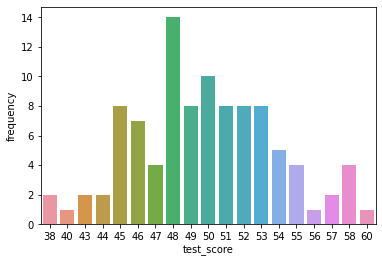

In [57]:
plot = seaborn.barplot(x='test_score',y='frequency', data=dataframe)

In [58]:
%%sql 

-- Feel free to experiment with the data set provided in this notebook for practice:
SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES;

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


## <ins>__Example 1__<ins> 


### Connect to the database

Let us first load the SQL extension and establish a connection with the database


The sql extension is already loaded. To reload it, use:
  %reload_ext sql
 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


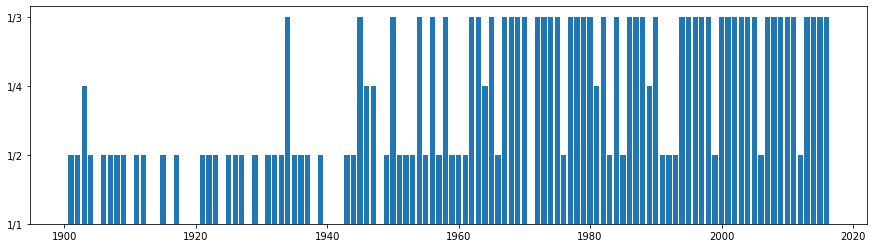

In [59]:
%load_ext sql

# Enter the connection string for your Db2 on Cloud database instance below
%sql ibm_db_sa://nxw18774:D3I4HWoJwvy63W1g@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB?security=SSL

df_sql = %sql SELECT * FROM NobelPrize 


df_py = df_sql.DataFrame()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps

df_py.head()

fig, ax = plt.subplots(figsize = [15,4])
ax.bar(df_py.YEAR, df_py.prize_share)
plt.show()

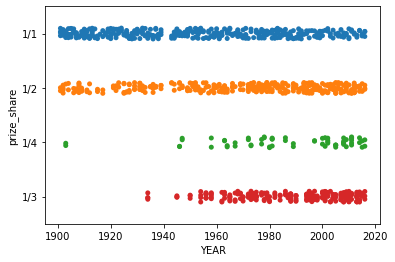

In [60]:
sns.stripplot(data = df_py, x='YEAR', y='prize_share')
plt.show()

## <ins>__Example 2__<ins>


In [73]:
# Connect To the DB
%load_ext sql

%sql ibm_db_sa://nxw18774:D3I4HWoJwvy63W1g@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB?security=SSL


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [63]:
%%sql
select *
from ChicagoPublicSchools

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


school_id,name_of_school,"Elementary, Middle, or High School",street_address,city,state,zip_code,phone_number,link,network_manager,collaborative_name,adequate_yearly_progress_made_,track_schedule,cps_performance_policy_status,cps_performance_policy_level,healthy_school_certified,safety_icon,safety_score,family_involvement_icon,family_involvement_score,environment_icon,environment_score,instruction_icon,instruction_score,leaders_icon,leaders_score,teachers_icon,teachers_score,parent_engagement_icon,parent_engagement_score,parent_environment_icon,parent_environment_score,average_student_attendance,rate_of_misconducts__per_100_students_,average_teacher_attendance,individualized_education_program_compliance_rate,pk_2_literacy__,pk_2_math__,gr3_5_grade_level_math__,gr3_5_grade_level_read__,gr3_5_keep_pace_read__,gr3_5_keep_pace_math__,gr6_8_grade_level_math__,gr6_8_grade_level_read__,gr6_8_keep_pace_math_,gr6_8_keep_pace_read__,gr_8_explore_math__,gr_8_explore_read__,isat_exceeding_math__,isat_exceeding_reading__,isat_value_add_math,isat_value_add_read,isat_value_add_color_math,isat_value_add_color_read,students_taking__algebra__,students_passing__algebra__,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),net_change_explore_and_plan,11th Grade Average ACT (2011),net_change_plan_and_act,college_eligibility__,graduation_rate__,college_enrollment_rate__,college_enrollment,general_services_route,freshman_on_track_rate__,x_coordinate,y_coordinate,latitude,longitude,community_area_number,community_area_name,ward,police_district,location
610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610038.pdf,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 1,Yes,Very Strong,99,Very Strong,99,Strong,74,Strong,66,Weak,65,Strong,70,Strong,56,Average,47,96.00%,2.0,96.40%,95.80%,80.1,43.3,89.6,84.9,60.7,62.6,81.9,85.2,52,62.4,66.3,77.9,69.7,64.4,0.2,0.9,Yellow,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,NDA,1171699.458,1915829.428,41.92449696,-87.64452163,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
610281,Adam Clayton Powell Paideia Community Academy Elementary School,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610281.pdf,Skyway Elementary Network,SOUTH SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,54,Strong,66,Strong,74,Very Strong,84,Weak,63,Strong,76,Weak,46,Average,50,95.60%,15.7,95.30%,100.00%,62.4,51.7,21.9,15.1,29,42.8,38.5,27.4,44.8,42.7,14.1,34.4,16.8,16.5,0.7,1.4,Green,Green,17.2,27.3,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,521,46,NDA,1196129.985,1856209.466,41.76032435,-87.55673627,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610185.pdf,Midway Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 2,No,Strong,61,NDA,NDA,Average,50,Weak,36,Weak,NDA,NDA,NDA,Average,47,Weak,41,95.70%,2.3,94.70%,98.30%,53.7,26.6,38.3,34.7,43.7,57.3,48.8,39.2,46.8,44,7.5,21.9,18.3,15.5,-0.9,-1.0,Red,Red,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,1324,44,NDA,1148427.165,1851012.215,41.74711093,-87.73170248,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_609993.pdf,Pershing Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,56,Average,44,Average,45,Weak,37,Weak,65,Average,48,Average,53,Strong,58,95.50%,10.4,95.80%,100.00%,76.9,NDA,26,24.7,61.8,49.7,39.2,27.2,69.7,60.6,9.1,18.2,11.1,9.6,0.9,2.4,Green,Green,42.9,25,NDA,NDA,NDA,NDA,NDA,NDA,NDA,N

### Query the database system catalog to retrieve column metadata

##### The SCHOOLS table contains a large number of columns. How many columns does this table have?


- First Answer


In [17]:
import pandas as pd
table = %sql select * from ChicagoPublicSchools

df = table.DataFrame()

print('The School table has {} column.'.format(len(df.columns)))

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.
The School table has 78 column.


In [ ]:
%sql select count(*) from SYSCAT.COLUMNS where TABNAME = 'SCHOOLS'

%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'SCHOOLS'

### Problems


##### How many Elementary Schools are in the dataset?


In [33]:
%%sql
select count(*)
from ChicagoPublicSchools
where "Elementary, Middle, or High School" = 'ES'

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


1
462


##### What is the highest Safety Score?


In [34]:
%%sql

select max(safety_score)
from ChicagoPublicSchools

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


1
99


##### What are the top 10 schools with the highest "Average Student Attendance"?

In [40]:
%%sql

select school_id , name_of_school
from ChicagoPublicSchools
where average_student_attendance = (select max(average_student_attendance)
  from ChicagoPublicSchools)

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


school_id,name_of_school
609959,John Charles Haines Elementary School


##### Retrieve the list of 5 Schools with the lowest Average Student Attendance sorted in ascending order based on attendance

In [45]:
%%sql

select school_id, name_of_school, average_student_attendance
from ChicagoPublicSchools
order by average_student_attendance asc
limit 5

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


school_id,name_of_school,average_student_attendance
609702,Richard T Crane Technical Preparatory High School,57.90%
609871,Barbara Vick Early Childhood & Family Center,60.90%
609736,Dyett High School,62.50%
609727,Wendell Phillips Academy High School,63.00%
610389,Orr Academy High School,66.30%


##### Now remove the '%' sign from the above result set for Average Student Attendance column

In [46]:
%%sql

select school_id, name_of_school, substring(average_student_attendance,0,length(average_student_attendance)-1)
from ChicagoPublicSchools
order by average_student_attendance asc
limit 5

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


school_id,name_of_school,3
609702,Richard T Crane Technical Preparatory High School,57.9
609871,Barbara Vick Early Childhood & Family Center,60.9
609736,Dyett High School,62.5
609727,Wendell Phillips Academy High School,63.0
610389,Orr Academy High School,66.3


##### Which Schools have Average Student Attendance lower than 70%?

In [51]:
%%sql

select school_id, name_of_school, average_student_attendance
from ChicagoPublicSchools
where average_student_attendance < '70'

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


school_id,name_of_school,average_student_attendance
609871,Barbara Vick Early Childhood & Family Center,60.90%
609674,Chicago Vocational Career Academy High School,68.80%
609736,Dyett High School,62.50%
609722,Manley Career Academy High School,66.80%
610389,Orr Academy High School,66.30%
609702,Richard T Crane Technical Preparatory High School,57.90%
609759,Roberto Clemente Community Academy High School,69.60%
609727,Wendell Phillips Academy High School,63.00%


##### Get the total College Enrollment for each Community Area


In [54]:
%%sql

select community_area_number ,community_area_name, sum(college_enrollment) as Total_College_Enrollment
from ChicagoPublicSchools
group by community_area_number ,community_area_name
order by sum(college_enrollment) desc
limit 5

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


community_area_number,community_area_name,total_college_enrollment
30,SOUTH LAWNDALE,14793
19,BELMONT CRAGIN,14386
25,AUSTIN,10933
63,GAGE PARK,9915
58,BRIGHTON PARK,9647


##### Get the 5 Community Areas with the least total College Enrollment  sorted in ascending order

In [55]:
%%sql

select community_area_number ,community_area_name, sum(college_enrollment) as Total_College_Enrollment
from ChicagoPublicSchools
group by community_area_number ,community_area_name
order by sum(college_enrollment) asc
limit 5

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


community_area_number,community_area_name,total_college_enrollment
36,OAKLAND,140
37,FULLER PARK,531
47,BURNSIDE,549
76,OHARE,786
32,LOOP,871


##### List 5 schools with lowest safety score.


In [56]:
%%sql

select school_id, name_of_school, safety_score
from ChicagoPublicSchools
order by safety_score
limit 5

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


school_id,name_of_school,safety_score
609819,Edmond Burke Elementary School,1
610108,Luke O'Toole Elementary School,5
610202,George W Tilton Elementary School,6
609927,Foster Park Elementary School,11
609712,Emil G Hirsch Metropolitan High School,13


##### Get the hardship index for the community area which has College Enrollment of 4368

In [61]:
%%sql

select community_area_number , sum(college_enrollment)
from ChicagoPublicSchools
group by community_area_number
having sum(college_enrollment) = 4368

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


community_area_number,2


## Example 4

In [68]:
crimes = %sql select * from CHICAGOCRIMEDATA
census = %sql select * from CHICAGOCENSUSDATA
schools = %sql select * from CHICAGOPUBLICSCHOOLS

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.
 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.
 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


Problem 1: Find the total number of crimes recorded in the CRIME table.


In [64]:
# SQL
%%sql

select count(*)
from CHICAGOCRIMEDATA

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


1
533


Problem 2: List community areas with per capita income less than 11000.


In [65]:
%%sql

select COMMUNITY_AREA_NUMBER, COMMUNITY_AREA_NAME
from CHICAGOCENSUSDATA
where PER_CAPITA_INCOME < 11000

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


community_area_number,community_area_name
26,West Garfield Park
30,South Lawndale
37,Fuller Park
54,Riverdale


Problem 3: List all case numbers for crimes involving minors?


In [94]:
%%sql 
SELECT CASE_NUMBER
FROM CHICAGOCRIMEDATA 
WHERE DESCRIPTION LIKE '%MINOR%';

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


case_number
HL266884
HK238408


Problem 4: List all kidnapping crimes involving a child?(children are not considered minors for the purposes of crime analysis)


In [96]:
%%sql 
SELECT CASE_NUMBER, PRIMARY_TYPE, DESCRIPTION
FROM CHICAGOCRIMEDATA
WHERE PRIMARY_TYPE = 'KIDNAPPING';

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


case_number,primary_type,description
HN144152,KIDNAPPING,CHILD ABDUCTION/STRANGER


Problem 5: What kind of crimes were recorded at schools?


In [98]:
%%sql

select distinct(primary_type)
from CHICAGOCRIMEDATA
where location_description like '%SCHOOL%'

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


primary_type
ASSAULT
BATTERY
CRIMINAL DAMAGE
CRIMINAL TRESPA
NARCOTICS
PUBLIC PEACE VI


Problem 6: List the average safety score for all types of schools.


In [105]:
%%sql

select "Elementary, Middle, or High School",avg(safety_score) as Average_Score
from CHICAGOPUBLICSCHOOLS
group by "Elementary, Middle, or High School"

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


"Elementary, Middle, or High School",average_score
ES,49
HS,49
MS,48


Problem 7: List 5 community areas with highest % of households below poverty line.


In [113]:
%%sql

select community_area_number, community_area_name, percent_households_below_poverty
from CHICAGOCENSUSDATA
order by percent_households_below_poverty desc
limit 5

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


community_area_number,community_area_name,percent_households_below_poverty
54,Riverdale,56.5
37,Fuller Park,51.2
68,Englewood,46.6
29,North Lawndale,43.1
27,East Garfield Park,42.4



Problem 8: Which community area(number) is most crime prone?




In [125]:
%%sql

select community_area_number, sum(id) Amount_Of_Crime
from CHICAGOCRIMEDATA
group by community_area_number 
order by Amount_Of_Crime desc
limit 1

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


community_area_number,amount_of_crime
25,270882877


Problem 9: Use a sub-query to find the name of the community area with highest hardship index.


In [131]:
%%sql
SELECT community_area_name
FROM  CHICAGOCENSUSDATA
WHERE hardship_index = (SELECT MAX(hardship_index) FROM CHICAGOCENSUSDATA);

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


community_area_name
Riverdale


Problem 10: Use a sub-query to determine the Community Area Name with most number of crimes?

In [143]:
%%sql
SELECT community_area_name
FROM CHICAGOCENSUSDATA 
WHERE COMMUNITY_AREA_NUMBER = (
SELECT CCD.COMMUNITY_AREA_NUMBER 
FROM CHICAGOCRIMEDATA AS CCD 
GROUP BY CCD.COMMUNITY_AREA_NUMBER
ORDER BY COUNT(CCD.COMMUNITY_AREA_NUMBER) DESC
LIMIT 1)

LIMIT 1;

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


community_area_name
Austin


## Example 5

In [1]:
# Connect To the DB
%load_ext sql

%sql ibm_db_sa://nxw18774:D3I4HWoJwvy63W1g@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB?security=SSL


In [74]:
CHICAGOCRIMEDATA = %sql select * from CHICAGOCRIMEDATA
CHICAGOCENSUSDATA = %sql select * from CHICAGOCENSUSDATA
CHICAGOPUBLICSCHOOLS = %sql select * from CHICAGOPUBLICSCHOOLS

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.
 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.
 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


### Problem 1
List the case number, type of crime and community area for all crimes in community area number 18.

In [5]:
%%sql

select 
case_number,
primary_type,
community_area_number
from CHICAGOCRIMEDATA
where community_area_number = 18;


 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


case_number,primary_type,community_area_number
JA560123,CRIMINAL DAMAGE,18
JA107722,OTHER OFFENSE,18


### Problem 2
List all crimes that took place at a school. Include case number, crime type and community name.

In [11]:
%%sql

select 
c1.primary_type,
c2.community_area_name,
c1.location_description
from CHICAGOCRIMEDATA as c1
inner join CHICAGOPUBLICSCHOOLS as c2
on c1.community_area_number = c2.community_area_number
where c1.location_description like '%SCHOOL%'
limit 5

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


primary_type,community_area_name,location_description
BATTERY,SOUTH SHORE,"SCHOOL, PUBLIC, GROUNDS"
BATTERY,ASHBURN,"SCHOOL, PUBLIC, GROUNDS"
CRIMINAL TRESPA,ASHBURN,"SCHOOL, PUBLIC, GROUNDS"
ASSAULT,EAST GARFIELD PARK,"SCHOOL, PUBLIC, GROUNDS"
BATTERY,ASHBURN,"SCHOOL, PUBLIC, GROUNDS"


### Problem 3
For the communities of Oakland, Armour Square, Edgewater and CHICAGO list the associated community_area_numbers and the case_numbers.

In [25]:
%%sql

select 
c1.community_area_number,
c1.case_number
from CHICAGOCRIMEDATA as c1
inner join CHICAGOPUBLICSCHOOLS as c2
on c1.community_area_number = c2.community_area_number
where c2.community_area_name in ('OAKLAND', 'ARMOR SQUARE', 'EDGEWATER' , 'CHICAGO')

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


community_area_number,case_number
77,HV537004
77,HV537004
77,HV537004
77,HV537004
77,HV537004
77,HV537004
77,HM392612
77,HM392612
77,HM392612
77,HM392612


### Question 1

Write and execute a SQL query to list the school names, community names and average attendance for communities with a hardship index of 98.


In [32]:
%%sql

select 
name_of_school,
c1.community_area_name,
c1.average_student_attendance
from CHICAGOPUBLICSCHOOLS as c1
left join CHICAGOCENSUSDATA as c2
on c1.community_area_name = c2.community_area_name
where c2.hardship_index = 98

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


name_of_school,community_area_name,average_student_attendance


### Question 2

Write and execute a SQL query to list all crimes that took place at a school. Include case number, crime type and community name.


In [34]:
%%sql

select 
c1.primary_type,
c1.case_number,
c2.community_area_name,
c1.location_description
from CHICAGOCRIMEDATA as c1
inner join CHICAGOPUBLICSCHOOLS as c2
on c1.community_area_number = c2.community_area_number
where c1.location_description like '%SCHOOL%'
limit 5

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


primary_type,case_number,community_area_name,location_description
BATTERY,HL353697,SOUTH SHORE,"SCHOOL, PUBLIC, GROUNDS"
BATTERY,JA460432,ASHBURN,"SCHOOL, PUBLIC, GROUNDS"
CRIMINAL TRESPA,HR585012,ASHBURN,"SCHOOL, PUBLIC, GROUNDS"
ASSAULT,HT315369,EAST GARFIELD PARK,"SCHOOL, PUBLIC, GROUNDS"
BATTERY,JA460432,ASHBURN,"SCHOOL, PUBLIC, GROUNDS"


### Question 1

Write and execute a SQL statement to create a view showing the columns listed in the following table, with new column names as shown in the second column.


In [46]:
%%sql

create view question1 (School_Name,Safety_Rating,Family_Rating,Environment_Rating,Instruction_Rating,Leaders_Rating,Teachers_Rating)
as
select 
name_of_school,
safety_icon,
Family_Involvement_Icon,
Environment_Icon,
Instruction_Icon,
Leaders_Icon,
Teachers_Icon
from CHICAGOPUBLICSCHOOLS


 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


[]

In [48]:
%%sql

select *
from question1
limit 5

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


school_name,safety_rating,family_rating,environment_rating,instruction_rating,leaders_rating,teachers_rating
Abraham Lincoln Elementary School,Very Strong,Very Strong,Strong,Strong,Weak,Strong
Adam Clayton Powell Paideia Community Academy Elementary School,Average,Strong,Strong,Very Strong,Weak,Strong
Adlai E Stevenson Elementary School,Strong,NDA,Average,Weak,Weak,NDA
Agustin Lara Elementary Academy,Average,Average,Average,Weak,Weak,Average
Air Force Academy High School,Average,Strong,Strong,Average,Weak,Average


In [49]:
%%sql

select school_name,leaders_rating
from question1
limit 5

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


school_name,leaders_rating
Abraham Lincoln Elementary School,Weak
Adam Clayton Powell Paideia Community Academy Elementary School,Weak
Adlai E Stevenson Elementary School,Weak
Agustin Lara Elementary Academy,Weak
Air Force Academy High School,Weak


### Question 1

Write the structure of a query to create or replace a stored procedure called UPDATE_LEADERS_SCORE that takes a in_School_ID parameter as an integer and a in_Leader_Score parameter as an integer. Don't forget to use the #SET TERMINATOR statement to use the @ for the CREATE statement terminator.


In [76]:
%%sql

create procedure UPDATE_LEADERS_SCORE (in in_School_ID int, in in_Leader_Score int)
language sql
begin
update CHICAGOPUBLICSCHOOLS
set Leaders_Score  = in_Leader_Score
where school_id = in_School_ID;
end

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


[]

In [77]:
%%sql

call UPDATE_LEADERS_SCORE(3512276, 50)

 * ibm_db_sa://nxw18774:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/BLUDB
Done.


[]

### Question 1

Update your stored procedure definition. Add a generic ELSE clause to the IF statement that rolls back the current work if the score did not fit any of the preceding categories.


# <ins>__Parallel Programming with Dask in Python__<ins>

In [15]:
import psutil, os

def memory_footprint():
'''
Returns the memory(MB) being used by Python Process.
'''

mem = psutil.Process(os.getpid()).memory_info().rss
return print('Current Memory Usage: {} MB'.format(round(mem / 1024**2, 3)))

In [91]:
memory_footprint()

Current Memory Usage: 33.324 MB


In [17]:
import numpy as np

array = np.array([1,2,3,4])

In [93]:
memory_footprint()

Current Memory Usage: 46.496 MB


## Dask

### delayed function

In [2]:
from dask import delayed


def sqrt1(num1):
return np.sqrt(num1)

def sqrt2(num2):
return np.sqrt(num2)

def sqrt3(num3):
return np.sqrt(num3)

- Without Dask

In [6]:
x = 4

In [7]:
result1 = sqrt1(4)
result2 = sqrt2(sqrt1(4))
result3 = sqrt3(sqrt2(sqrt1(4)))

In [8]:
result3

1.189207115002721

- With Dask

In [9]:
result1 = delayed(sqrt1(4))
result2 = delayed(sqrt2(sqrt1(4)))
result3 = delayed(sqrt3(sqrt2(sqrt1(4))))

In [10]:
# Computation occurs now
result3.compute()

1.189207115002721

- As we can see, we get the same result. 

In [29]:
# Regular Function
def sqrt1(num1):
return np.sqrt(num1)


# Dask's Delayed Function
@delayed
def sqrt1_delayed(num1):
return np.sqrt(num1)

In [31]:
sqrt1(4)

2.0

In [32]:
sqrt1_delayed(4)

Delayed('sqrt1_delayed-c5162a1a-4d93-466c-9172-3fad12fabd95')

In [33]:
sqrt1_delayed(4).compute()

2.0

## Deferring Computation with Loops

In [36]:
@delayed
def increment(x):
return x + 1

@delayed
def double(x):
return 2 * x

@delayed
def add(x, y):
return x + y

In [41]:
data = [ 1,2,3,4,5]
output = []

for i in data:

a = increment(i) # i + 1

b = double(i) # 2 * i

c = add(a, b) # (i + 1) + (2 * i)

output.append(c)

In [42]:
output

[Delayed('add-adbf9a0c-9708-41ff-a39a-976b6d6a88a5'),
 Delayed('add-c336e897-b5cf-4768-848c-19796fec81e1'),
 Delayed('add-99d39928-8691-4fb7-bc58-59a6ba211432'),
 Delayed('add-7c65841f-2dd0-450a-8332-79ac1ffc605c'),
 Delayed('add-e30359e0-c0f3-403c-8a4a-2cd3b94014a9')]

In [46]:
total = sum(output)
total.compute()

50

## Working with Dask Arrays

- Numpy Array

In [48]:
import numpy as np

a = np.random.rand(10000)
print(a.sum())
print(a.mean())


4980.100863886294
0.4980100863886294


In [49]:
print(a.shape)

(10000,)


- Dask Chunks 

In [53]:
import dask.array as da

# Creating 4 chunks out of the Numpy array
a_dask = da.from_array(a, chunks = len(a) // 4)

# Checking the size
a_dask.chunks

((2500, 2500, 2500, 2500),)

- Summing the array in chunks

In [55]:
a_dask

dask.array<array, shape=(10000,), dtype=float64, chunksize=(2500,), chunktype=numpy.ndarray>

In [59]:
a_dask.sum().compute()

4980.100863886293

# Airflow

## CLI Commands
``````
Quick Tour of Airflow CLI 
Some commands that we can run inside the Airflow container

docker ps
* Show running docker containers


docker exec -it container_id /bin/bash
* Execute the command /bin/bash in the container_id to get a shell session


pwd
* Print the current path where you are


airflow db init
* Initialise the metadatabase


airflow db reset
* Reinitialize the metadatabase (Drop everything)


airflow db upgrade
* Upgrade the metadatabase (Latest schemas, values, ...)


airflow webserver
* Start Airflow’s webserver


airflow scheduler
* Start Airflow’s scheduler


airflow celery worker
* Start a Celery worker (Useful in distributed mode to spread tasks among nodes - machines)


airflow dags list
* Give the list of known dags (either those in the examples folder or in dags folder)


ls
* Display the files/folders of the current directory 


airflow dags trigger example_python_operator
* Trigger the dag example_python_operator with the current date as execution date


airflow dags trigger example_python_operator -e 2021-01-01
* Trigger the dag example_python_operator with a date in the past as execution date (This won’t trigger the tasks of that dag unless you set the option catchup=True in the DAG definition)


airflow dags trigger example_python_operator -e '2021-01-01 19:04:00+00:00'
* Trigger the dag example_python_operator with a date in the future (change the date here with one having +2 minutes later than the current date displayed in the Airflow UI). The dag will be scheduled at that date.


airflow dags list-runs -d example_python_operator
* Display the history of example_python_operator’s dag runs


airflow tasks list example_python_operator
* List the tasks contained into the example_python_operator dag


airflow tasks test example_python_operator print_the_context 2021-01-01
* Allow to test a task (print_the_context) from a given dag (example_python_operator here) without taking care of dependencies and past runs. Useful for debugging.

``````

## Bash

### Export table from MySQL to airflow-worker

- Grab the IP of the mysql container

In [ ]:
from airflow.operators.bash import BashOperator

# DAG #8 - Extract Solution MySQL
extract_solution_mysql = BashOperator(
task_id = 'extract_solution_mysql',

# 1. Connect to Mysql and output the table majorityelement_solution
# 2. Remove headers
bash_command= '''
mysql -h 192.168.176.4 -u root --password=root airflow -e "SELECT * FROM majorityelement_solution" > /tmp/mysql_solution.csv;
sed -i 1d /tmp/mysql_solution.csv; 
'''
)

### Store files in HDFS


In [ ]:
from socket import timeout
from airflow import DAG
from airflow.providers.http.sensors.http import HttpSensor
from airflow.sensors.filesystem import FileSensor
from airflow.operators.python import PythonOperator
from airflow.operators.bash import BashOperator

from datetime import datetime, timedelta
import json
import requests
import csv


default_args = {
"owner":"airflow",
"email_on_failure": False,
"email_on_retry": False,
"email":"admin@localhost.com",
"retries":1,
"retry_delay":timedelta(minutes=5) 
}


# Download forex rates according to the currencies we want to watch
# described in the file forex_currencies.csv
def _download_rates():
BASE_URL = "https://gist.githubusercontent.com/marclamberti/f45f872dea4dfd3eaa015a4a1af4b39b/raw/"
ENDPOINTS = {
'USD': 'api_forex_exchange_usd.json',
'EUR': 'api_forex_exchange_eur.json'
}
with open('/opt/airflow/dags/files/forex_currencies.csv') as forex_currencies:
reader = csv.DictReader(forex_currencies, delimiter=';')
for idx, row in enumerate(reader):
base = row['base']
with_pairs = row['with_pairs'].split(' ')
indata = requests.get(f"{BASE_URL}{ENDPOINTS[base]}").json()
outdata = {'base': base, 'rates': {}, 'last_update': indata['date']}
for pair in with_pairs:
outdata['rates'][pair] = indata['rates'][pair]
with open('/opt/airflow/dags/files/forex_rates.json', 'a') as outfile:
json.dump(outdata, outfile)
outfile.write('\n')


with DAG('forex_data_pipeline', start_date=datetime(2021, 1, 1), 
schedule_interval="@daily", default_args=default_args, catchup=False ) as dag:

# Dag #1 - Check availability of forex rates
is_forex_rates_available = HttpSensor(
task_id = 'is_forex_rates_available', # Name of the DAG
http_conn_id= 'forex_api',  # Name of the connection
endpoint='marclamberti/f45f872dea4dfd3eaa015a4a1af4b39b', # Where to check connections
response_check=lambda response: 'rates' in response.text, # Check if "rates" is in the response
poke_interval = 5, 
timeout = 20
)

# Dag #2 - Is the file forex_currencies.csv available
is_forex_currencies_file_available = FileSensor(
task_id = 'is_forex_currencies_file_available',
fs_conn_id = 'forex_path', # Name of the connection
filepath =  'forex_currencies.csv', # relative path to the file(in the connection, we specified that the path is:opt/airflow/dags/files, so the relavtive path to the file is just the file name)
poke_interval = 5,
timeout = 20
)

# Dag #3 - Download Rates
download_rates = PythonOperator(
task_id = 'download_rates',
python_callable = _download_rates
)


# Dag #4 - Store rates in HDFS
# First Command - Create a directory called forex
# Second Command - Copy the JSON file from $AIRFLOW_HOME/dags/files/forex_rates.json to /forex 
saving_rates = BashOperator(
task_id = 'saving_rates',
bash_command ="""
hdfs dfs -mkdir -p /forex && \
hdfs dfs -put -f $AIRFLOW_HOME/dags/files/forex_rates.json /forex
"""
)   

# Dependencies
is_forex_rates_available >> is_forex_currencies_file_available >> download_rates

## Postgres

### Create a table
- First, Create a connection:

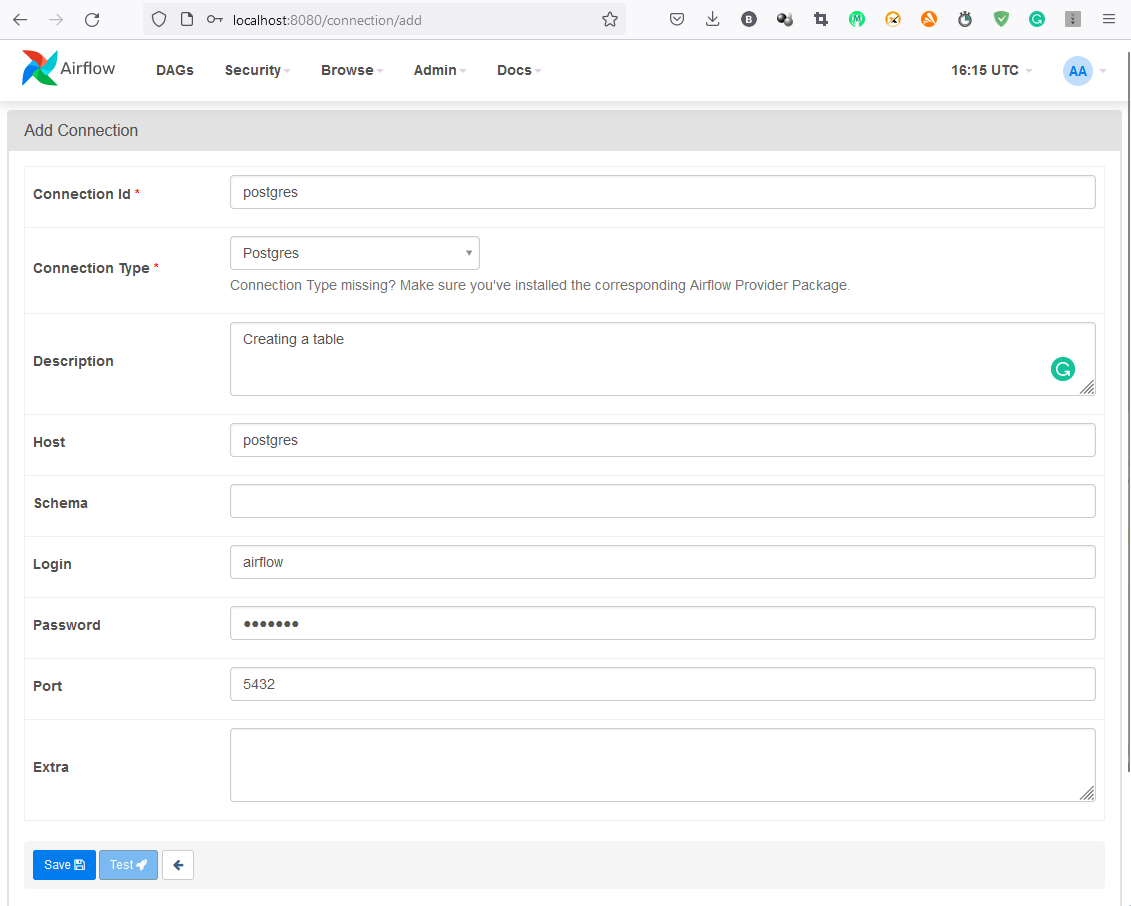

In [3]:
from IPython.display import Image
Image('images/postgres_connection.png')

In [ ]:
  # Dag #2 - Create a table
create_table = PostgresOperator(
        task_id = 'create_table',
        postgres_conn_id='postgres',
        sql='''

            drop table if exists rates;

            create table rates(
                rate float not null,
                symbol text not null
            );
        '''
    )


### Insert Data to Postgres

In [ ]:
insert_data_postgres = PostgresOperator(
        task_id = 'insert_data_postgres',
        postgres_conn_id='postgres',
        sql='''
        insert into majorityelement
        (nums)
        values
        (3),
        (2),
        (3);
        '''
    )

### Creating a Postgres table and inserting data

In [ ]:


import airflow
from datetime import timedelta
from airflow import DAG
from airflow.operators.postgres_operator import PostgresOperator
from airflow.utils.dates import days_ago

args={'owner': 'airflow'}

dag_psql = DAG(
    dag_id = "postgresoperator_demo",
    default_args=args,
    # schedule_interval='0 0 * * *',
    schedule_interval='@once',	
    dagrun_timeout=timedelta(minutes=60),
    description='use case of psql operator in airflow',
    start_date = airflow.utils.dates.days_ago(1)
)

create_table_sql_query = """ 
CREATE TABLE employee (id INT NOT NULL, name VARCHAR(250) NOT NULL, dept VARCHAR(250) NOT NULL);
"""
insert_data_sql_query = """
insert into employee (id, name, dept) values(1, 'vamshi','bigdata'),(2, 'divya','bigdata'),(3, 'binny','projectmanager'),
(4, 'omair','projectmanager') ;"""


		# dag #1
create_table = PostgresOperator(
sql = create_table_sql_query,
task_id = "create_table_task",
postgres_conn_id = "postgres_local",
dag = dag_psql
)

		# dag #2
insert_data = PostgresOperator(
sql = insert_data_sql_query,
task_id = "insert_data_task",
postgres_conn_id = "postgres_local",
dag = dag_psql
)

# Dependecies
create_table >> insert_data

if __name__ == "__main__":
    dag_psql.cli()

### Export table from Postgres to airflow-worker

In [ ]:
def _extract_data_python(copy_sql):
    hook = PostgresHook(postgres_conn_id = 'postgres')
    logging.info('Exporting query to file')
    hook.copy_expert(copy_sql, filename='/tmp/majorityelement.csv'
    )

# DAG #9 - Extract Data python
    extract_data_python = PythonOperator(
        task_id = 'extract_data_python',
        python_callable=_extract_data_python,
        op_kwargs={
        "copy_sql": "COPY (SELECT * FROM majorityelement) TO STDOUT WITH CSV HEADER"
        }
    )

## MySQL

## Hive

## Python

## Spark

## Others

### HttpSensor

#### Check if API is available
- Create a new connection first:

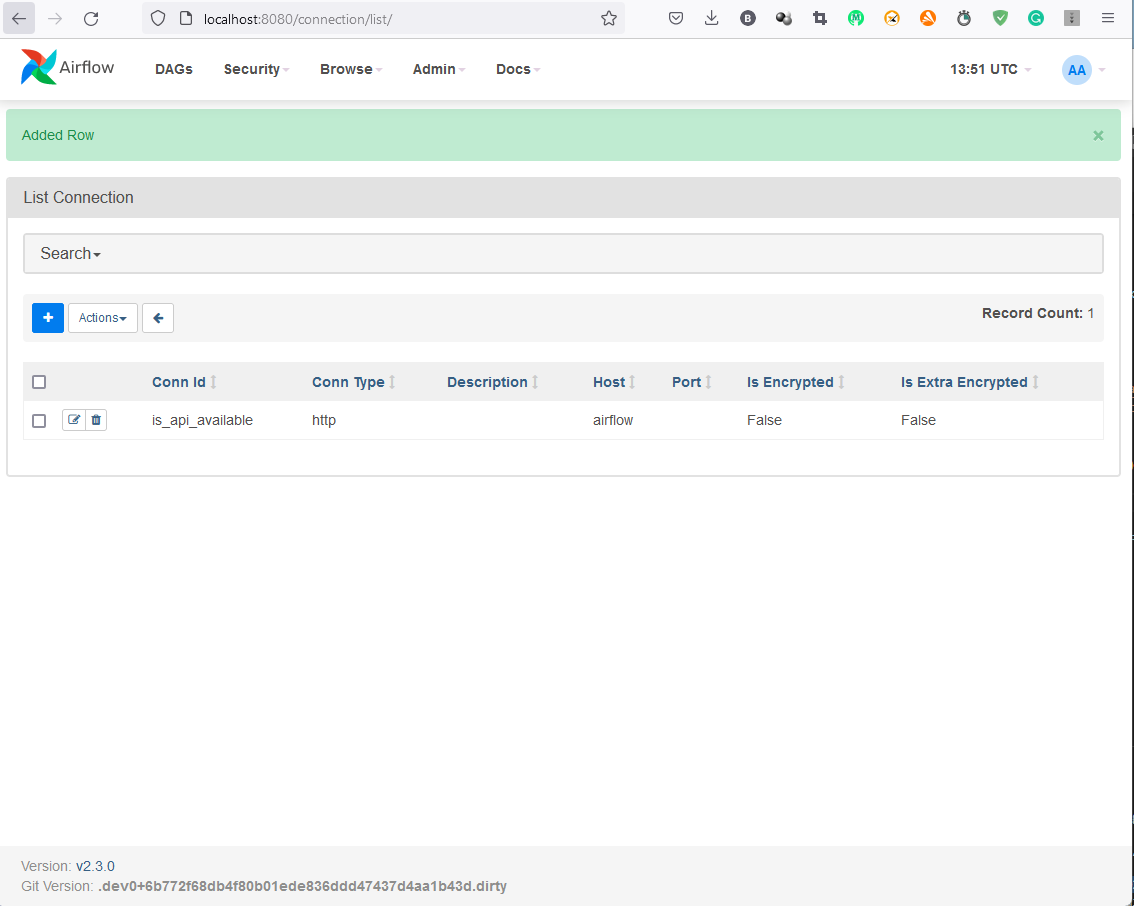

In [2]:
from IPython.display import Image
Image('images/is_api_available.png')

In [ ]:
# Dag #1 - Check if the API is available
is_api_available = HttpSensor(
task_id='is_api_available',
method='GET',
http_conn_id='is_api_available',
endpoint= current_date + '?access_key=720ead7bdefed8501715c6d714293717',
response_check= lambda response: 'EUR' in response.text,
poke_interval = 5
)

# <ins>__Spark__<ins>

http://localhost:8888/lab/tree/Data%20Science-Ariel%20%2C%20Data%20Camp%20%2C%20DSDJ/Cheatsheet/SparkSQL.ipynb

# <ins>__Google Cloud__<ins>

- Before starting refer to the Data Engineering Cheatsheet about what do to before running this code.

## Create a storage client

In [ ]:
import os 
from google.cloud import storage

# Creating an Environmental Variable for the service key configuration
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'ServiceKey_GoogleCloud.json'

# Creating a storage client
storage_client = storage.Client()

## Create a new Bucket

In [ ]:
'''
Create a New Bucket
'''
bucket_name = 'bar_data_bucket1'
bucket = storage_client.bucket(bucket_name=bucket_name)
bucket.location = 'US'

bucket = storage_client.create_bucket(bucket)

## Upload CSV file to Bucket

In [ ]:
# Grabing the bucket object
bucket = storage_client.get_bucket('chapter_4')

# Create a blob from the csv file
blob = bucket.blob(blob_name='full_extract/order_extract.csv')

# Upload to bucket
blob.upload_from_filename('order_extract.csv')

## Google's BigQuery

### Creating a dataset, a table and loading csv file to BigQuery from a Bucket

In [ ]:
from csv import field_size_limit
from google.cloud import bigquery, storage
import os
from datetime import datetime

# Setting configs
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'ServiceKey_GoogleCloud.json'

# Create a big query client
bigquery_client = bigquery.Client()

# Grabbing today's date
today_date = str(datetime.today().year) + '-' +str(datetime.today().month) + '-' +str(datetime.today().day)


# Create a dataset called test_dataset
def getOrCreate_dataset(dataset_name):

'''
Get dataset. If dataset does not exist, create one.

Args:
- dataset_name(String)
Returns:
- dataset
'''

print('Fetching Dataset...')

try:
# get and return dataset if exist
dataset = bigquery_client.get_dataset(dataset_name)
print('Done')
print(dataset.self_link)
return dataset

except Exception as e:
# If not, create and return dataset
if e.code == 404:
print('Dataset does not exist. Creating a new one.')
bigquery_client.create_dataset(dataset_name)
dataset = bigquery_client.get_dataset(dataset_name)
print('Done')
print(dataset.self_link)
return dataset
else:
print(e)
 

def getOrCreate_table(dataset_name, table_name):

'''
Get table. If table does not exist, create one. If dataset does not exist, create one.

Args:
- dataset_name(String)
- table_name(String)
Returns:
- table
'''

# Grab prerequisites for creating a table
dataset = getOrCreate_dataset(dataset_name)
project = dataset.project
dataset = dataset.dataset_id
table = project + '.' + dataset + '.' + table_name

print('\nFetching Table...')

try:
# Get table if exists
t = bigquery_client.get_table(table)
print('Done')
print(t.self_link)
except Exception as e:

# If not, create and get table
if e.code == 404:
print('Table does not exist. Creating a new one.')
bigquery_client.create_table(table)
t = bigquery_client.get_table(table)
print(t.self_link)
finally:
return t


def load_to_bigQuery(dataset_name='log_activity', table_name='log_table', date_to_load = today_date):

'''
Load CSV file to BigQuery.

Args:
- date_to_load(String)
- Default - today
Returns:
- None
'''

# Creating a storage client
storage_client = storage.Client()

# Grab bucket data for loading  
bucket_name = 'orders_etl_bar' + date_to_load
bucket = storage_client.get_bucket('orders_etl_bar')
blob = bucket.blob(blob_name=date_to_load)

table = getOrCreate_table(dataset_name=dataset_name, table_name=table_name)


job_config = bigquery.LoadJobConfig(
schema=[
bigquery.SchemaField("Action", "STRING"),
bigquery.SchemaField("orderNumber", "INTEGER"),
bigquery.SchemaField("orderDate", "DATE"),
bigquery.SchemaField("requiredDate", "DATE"),
bigquery.SchemaField("shippedDate", "DATE"),
bigquery.SchemaField("status", "STRING"),
bigquery.SchemaField("comments", "STRING"),
bigquery.SchemaField("customerNumber", "INTEGER")
],
field_delimiter = '|',
source_format=bigquery.SourceFormat.CSV
)

uri = 'https://storage.cloud.google.com/orders_etl_bar/' + date_to_load
table_id = table.project + '.' + table.dataset_id + '.' + table.table_id

print('\nLoading log activity data...')
load_job = bigquery_client.load_table_from_uri(
uri, table_id, job_config=job_config
)  

load_job.result() 
print("Done. Loaded {} rows.".format(load_job.output_rows))


load_to_bigQuery()

# <ins>__Kafka__<ins>

## Connect to Kafka client

In [ ]:
from ensurepip import bootstrap
from kafka.admin import KafkaAdminClient, NewTopic, ConfigResource, ConfigResourceType

# Connect to Kafka
admin_client = KafkaAdminClient(bootstrap_servers="localhost:29092", client_id = 'test')

## Create topic

In [ ]:
bankbranch4 = NewTopic(name="bankbranch4", num_partitions= 2, replication_factor=1)
admin_client.create_topics([bankbranch4])

### Multiple topics

In [ ]:
topic_list = []

# Create a new topic object and add to the list
bankbranch1 = NewTopic(name="bankbranch1", num_partitions= 2, replication_factor=1)
bankbranch2 = NewTopic(name="bankbranch2", num_partitions= 2, replication_factor=1)
bankbranch3 = NewTopic(name="bankbranch3", num_partitions= 2, replication_factor=1)


topic_list.append(bankbranch1)
topic_list.append(bankbranch2)
topic_list.append(bankbranch3)

# Create new topics from the list
admin_client.create_topics(new_topics=topic_list)

## Describe topic

In [ ]:
# Describe topics
configs = admin_client.describe_configs(
config_resources=[ConfigResource(ConfigResourceType.TOPIC, "bankbranch4")])

configs

## Delete topic

In [ ]:
# Delete topics
admin_client.delete_topics(topics=[bankbranch4.name])

## List all topics

In [ ]:
admin_client.list_topics()

## Create a Producer

In [ ]:
from kafka import KafkaProducer
import json 

# Define and create a producer
producer = KafkaProducer(value_serializer=lambda v: json.dumps(v).encode('utf-8'), bootstrap_servers = "localhost:29092")

## Send a message

### In JSON Format(better)

In [ ]:
producer.send("bankbranch1", {'atmid':2, 'transid':101})

### Regular messages

In [ ]:
producer.send('bankbranch1', 'hi')
producer.send('bankbranch1', 'bye')
producer.send('bankbranch1', 'hi2')
producer.send('bankbranch1', 'bye3')

## Create a Consumer

In [ ]:
from kafka import KafkaConsumer

consumer = KafkaConsumer('bankbranch1', bootstrap_servers = "localhost:29092", auto_offset_reset = 'earliest')

## Print Message

In [ ]:
for msg in consumer:
print(msg.value.decode('utf-8'))

{"atmid": 1, "transid": 100}
"bye"
{"atmid": 2, "transid": 101}
"hi"
"hi"
"hi2"
"bye3"
{"atmid": 1, "transid": 100}

## Flask

- The implementation is in Pycharm.
- We need to create a Project with the following items:
1. static folder
2. templates folder
3. app.py

### 1. Basic Flask Structure - Printing Hello World

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def index():  # put application's code here
return 'Hello World'

if __name__ == '__main__':
app.run(debug=True)

### 2. render_template
- render_template will render the html file that we give it as input.
- So lets create a file called index, with the following structure:

#### Index.html

<!doctype html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport"
  content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0">
<meta http-equiv="X-UA-Compatible" content="ie=edge">
<title>Document</title>
</head>
<body>
Hello World 2
</body>
</html>

In [ ]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def index():  # put application's code here
return render_template('index.html')

if __name__ == '__main__':
app.run(debug=True)

- The output will look like this:

<!doctype html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport"
  content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0">
<meta http-equiv="X-UA-Compatible" content="ie=edge">
<title>Document</title>
</head>
<body>
Hello World 2
</body>
</html>

### 3. Template Inheritence
- We can create one file that will have some repeating structure that we can use to provide to other files to render.
- In other words, we dont have to create an html file like index for every single thing.
- So lets create another html file in the templates folder, this file will be called base.
- And it will contain the basic structure that the entire app is going to have.


- The base.html file will look like this:

In [ ]:
<!doctype html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport"
  content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0">
<meta http-equiv="X-UA-Compatible" content="ie=edge">
{% block head %}{% endblock %}
<title>Document</title>
</head>
<body>
{% block body %}{% endblock %}
</body>
</html>

- The {% block head %}{% endblock %} and {% block body %}{% endblock %} parts are going to be added to all the files that will inherite the base.html structure.
- So if i want that the file index.html to inherit that structure of base.html, ill do this:

- The index.html file will now look like this:

In [ ]:
{% extends 'base.html' %} # Telling Pycharm from where to get the inheritence

{% block head %} # Inherit the head strucure

{% endblock %}

{% block body %} # Inherit the body strucure

{% endblock %}



- Now we can add stuff to index.html and they are going to be in the structure of base.html.
- For example, lets add a paragraph to index.html that says "Hi Bar".

- The index.html will now look like this:

In [ ]:
{% extends 'base.html' %}

{% block head %}

{% endblock %}

{% block body %}
<h1>"Hi Bar"</h1>
{% endblock %}



### 4. Static content
- The static content will have some configurations that will apply to the entire app.
- For example, scaling, font style, font size, margins and so on, are all defined in the static content folder.
- Lets add a folder named css to the static folder, and add main.css to the css folder.


- Now lets add some basic configurations, the main.css will look like this:

In [ ]:
body{
margin: 0;
font-family: sans-serif;
}

- The two basic configuration are margin from the start of the page is equal to 0 and the font will be sans serif.
- Now we need to link the main.css file to the app.
- We can do it by linking the main.css file to the base.html file.
- And since the base.html inherit its structure to the entire app, the static content will also be inherited.
- We can link the main.css file to the base.html file, by adding:  
< link rel="stylesheet" href="{{ url_for('static', filename = 'css/main.css') }}">
- We also need to add to the app.py file: from flask import url_for.

- so now the base.html file will look like this:

In [ ]:
<!doctype html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport"
  content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0">
<meta http-equiv="X-UA-Compatible" content="ie=edge">
<link rel="stylesheet" href="{{ url_for('static', filename = 'css/main.css') }}"> # Link to the css.main file in the static folder.
{% block head %}{% endblock %}
<title>Document</title>
</head>
<body>
{% block body %}{% endblock %}
</body>
</html>

### 4. Adding a Database
- Now the next step is to add a database that can store information regarding the app.
- First lets add from flask_sqlalchemy import SQLAlchemy to the app.py.
- After that add to the app.py:
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///test.db'
db = SQLAlchemy(app)

In [ ]:
- This will basically create a db file called test, its based on sqllite.
- And we store the database in a variable called db.
- Now lets create some functions for the db:

- The functions of the db will be in the form of classes in the app.py file.
- For example, lets add the option to add rows to the db.
- Lets say that we want users to be able to add the id, content and date_created of tasks to the db.
- The class will look like this:

In [ ]:
class Todo(db.Model):
id = db.Column(db.Integer, primary_key=True) 
content = db.Column(db.String(200), nullable=False)
date_created = db.Column(db.DateTime, default=datetime.utcnow)

- We use the function Column, Its similar to creating tables in sql, we need t add the type of data, primary key, null or not, defualt values and so on.

- Now lets also add a function that whever a user enters a Task in the db, the function will automatically add the String "Task" with the id of the task that has been created.
- The function will look like this:

In [ ]:
def __repr__(self):
return '<Task %r>' % self.id

- And now the app.py is looking like this:

In [ ]:
from flask import Flask, render_template, url_for
from flask_sqlalchemy import SQLAlchemy
from datetime import datetime


app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///test.db'
db = SQLAlchemy(app)

class Todo(db.Model):
id = db.Column(db.Integer, primary_key=True)
content = db.Column(db.String(200), nullable=False)
date_created = db.Column(db.DateTime, default=datetime.utcnow)

def __repr__(self):
return '<Task %r>' % self.id

@app.route('/')
def index():  # put application's code here
return render_template('index.html')

if __name__ == '__main__':
app.run(debug=True)

In [ ]:
- Now in the terminal, write python.
- After that, from app import db
- After that, db.create_all()
- This will create an empty database in the flaskprojet file.

- Now lets change the index.html file to have a table with some columns, links and place to add tasks.
- The index will now look like this:

In [ ]:
{% extends 'base.html' %}

{% block head %}

{% endblock %}

{% block body %}
<div class ="content">
<h1>Task Master</h1>

<table>
<tr>
<th>Task</th>
<th>Added</th>
<th>Actions</th>
</tr>
<tr>
<td></td>
<td></td>
<td>
<a href="">Delete</a>
<br>
<a href="">Update</a>
</td>
</tr>
</table>

<form action="/" method="POST">
<input type="text" name="content" id="content">
<input type="submit" value="Add Task"
</form>
</div>
{% endblock %}


In [ ]:
5. Adding multiple functionalities.

- app.py

In [ ]:
from flask import Flask, render_template, url_for, request, redirect
from flask_sqlalchemy import SQLAlchemy
from datetime import datetime

app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///test.db'
db = SQLAlchemy(app)


class Todo(db.Model):
id = db.Column(db.Integer, primary_key=True)
content = db.Column(db.String(200), nullable=False)
date_created = db.Column(db.DateTime, default=datetime.utcnow)

def __repr__(self):
return '<Task %r>' % self.id

@app.route('/', methods=['POST', 'GET']) # The app accepts POST and GET requests
def index():  # put application's code here
if request.method == 'POST': # if the request is a POST(i.e insert) the variable task_content will be the input that the user wrote(its connected the index.html part: <input type="text" name="content" id="content">)
task_content = request.form['content']
new_task = Todo(content = task_content) # After that, add the text input to the Todo content(the class content has a variable called content that is a non nullabel string)

try:
db.session.add(new_task) # If that happens, add the new task to the db
db.session.commit() # And then commit
return redirect('/') # After that return the main page

except:
return 'There was an issue adding you task' # otherwise, print an error message
else:
tasks = Todo.query.order_by(Todo.date_created).all() # If nothing is inputed, query the db, as orderby and show everything
return render_template('index.html', tasks = tasks) # Render the query that returns everything


if __name__ == '__main__':
app.run(debug=True)


# <ins>__Architecture Diagram Tool__<ins>

In [11]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB 

with Diagram('Grouped Workers', show=False, direction='TB'): 
ELB('lb') >> [EC2('worker1'),
   EC2('worker2'),
   EC2('worker3'),
   EC2('worker4'),
   EC2('worker5')] >> RDS('events')

In [10]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'


# Generate Random Data

## Generating 100k customers

In [ ]:
import argparse
import random
from faker import Faker
import pandas as pd

def gen_user_data(file_name, num_records):
fake = Faker("en_US")
with open(file_name, "w") as file1:
file1.write('name,age,state,country\n')
for i in range(0, num_records):
file1.write(
f"{i},{fake.name()},{random.randint(10,99)},{fake.state()},{fake.country()}\n"
)

gen_user_data('fake_users.csv', num_records=100000)

df = pd.read_csv('fake_users.csv')
print(df.head())

# Diagrams

## Diagrams
- Diagrams are the main object

In [1]:
from diagrams import Diagram

In [4]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram") as diag:
EC2("web")

In [ ]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

# Change Format
with Diagram("Simple Diagram", outformat="jpg"):
EC2("web")

# OR
with Diagram("Simple Diagram Multi Output", outformat=["jpg", "png", "dot"]):
EC2("web")

# Filename
with Diagram("Simple Diagram", filename="my_diagram"):
EC2("web")

# Disable the automatic opening of the file (It allows custom Graphviz dot attributes options.)
with Diagram("Simple Diagram", show=False):
EC2("web")


In [6]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

graph_attr = {
"fontsize": "45",
"bgcolor": "transparent"
}

with Diagram("Simple Diagram", show=False, graph_attr=graph_attr):
EC2("web")

## Nodes
- A node is a single component in a system

- List of all nodes(there are more links)

https://diagrams.mingrammer.com/docs/nodes/onprem

https://diagrams.mingrammer.com/docs/nodes/aws

For example an EC2 node

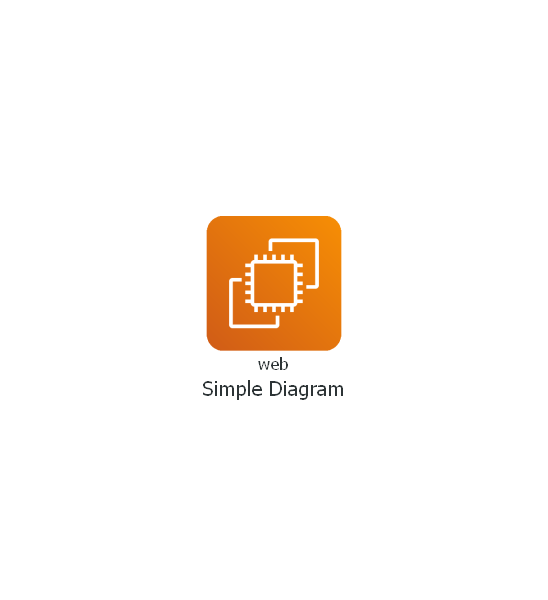

In [17]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

graph_attr = {
"fontsize": "45",
"bgcolor": "transparent"
}

with Diagram("Simple Diagram", show=False) as diag:
EC2("web")

diag

### Other nodes

In [ ]:
# aws resources
from diagrams.aws.compute import ECS, Lambda
from diagrams.aws.database import RDS, ElastiCache
from diagrams.aws.network import ELB, Route53, VPC
...

# azure resources
from diagrams.azure.compute import FunctionApps
from diagrams.azure.storage import BlobStorage
...

# alibaba cloud resources
from diagrams.alibabacloud.compute import ECS
from diagrams.alibabacloud.storage import ObjectTableStore
...

# gcp resources
from diagrams.gcp.compute import AppEngine, GKE
from diagrams.gcp.ml import AutoML 
...

# k8s resources
from diagrams.k8s.compute import Pod, StatefulSet
from diagrams.k8s.network import Service
from diagrams.k8s.storage import PV, PVC, StorageClass
...

# oracle resources
from diagrams.oci.compute import VirtualMachine, Container
from diagrams.oci.network import Firewall
from diagrams.oci.storage import FileStorage, StorageGateway

- For example - This is how to extract all of these images
- I took them from this link - https://diagrams.mingrammer.com/docs/nodes/onprem

In [21]:
from diagrams.aws.analytics import DataPipeline
from diagrams.onprem.analytics import Hadoop, Hive, Spark
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.vcs import Github
from diagrams.onprem.database import Cassandra, Mongodb, Mysql, Postgresql

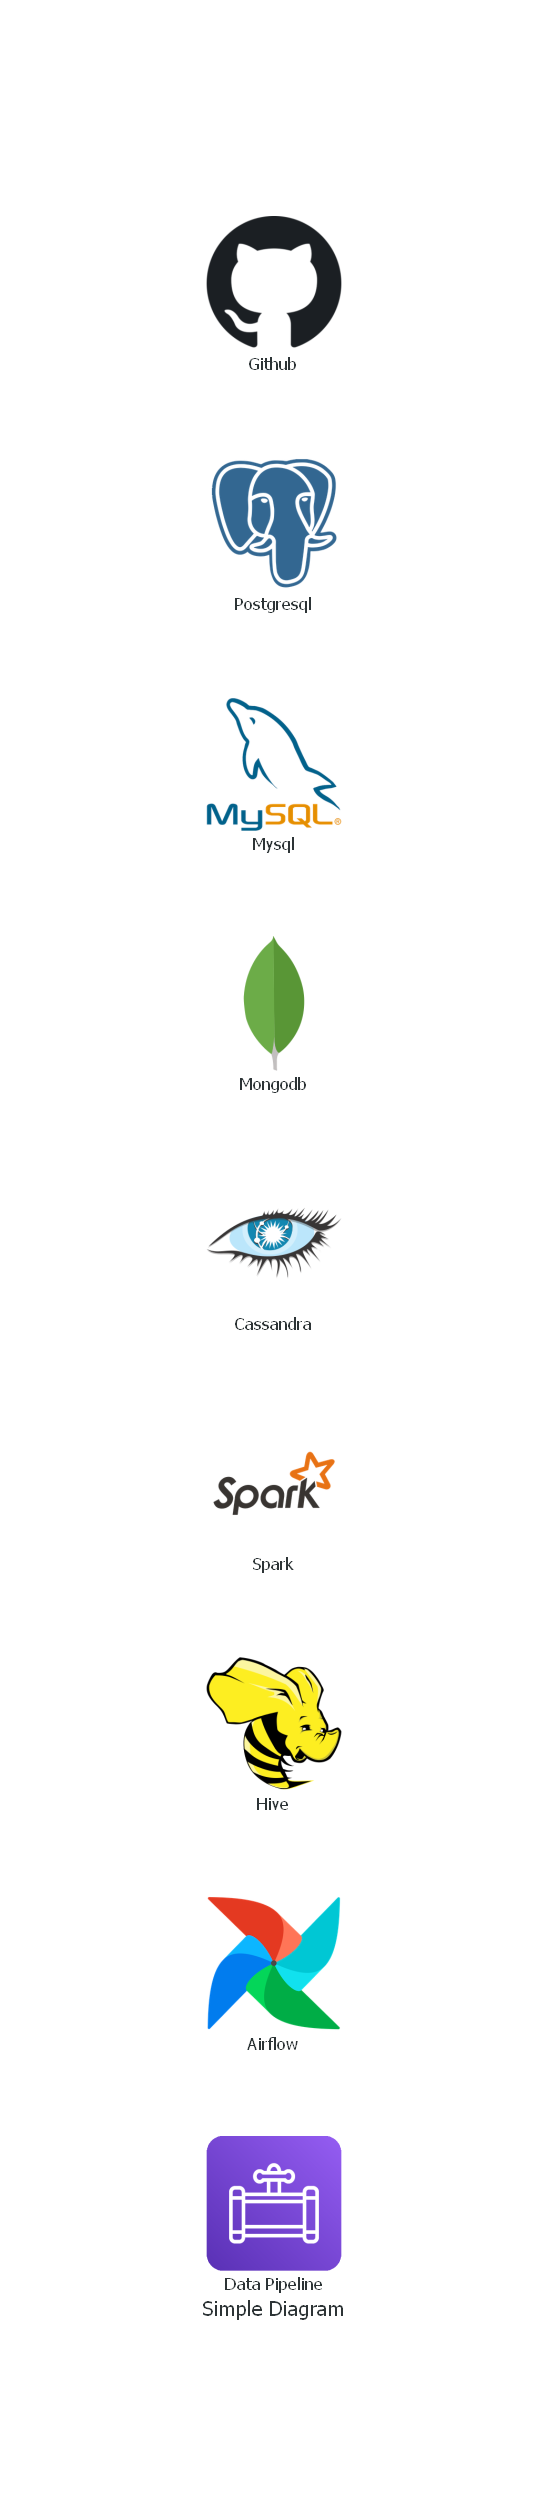

In [22]:
with Diagram("Simple Diagram", show=False) as diag:
DataPipeline('Data Pipeline')
Airflow("Airflow")
Hive("Hive")
Spark("Spark")
Cassandra("Cassandra")
Mongodb("Mongodb")
Mysql("Mysql")
Postgresql("Postgresql")
Github("Github")

diag

## Data Flow

- Next, we should learn how to connect them

You can represent data flow by connecting the nodes with these operators: >>, << and -.

>>: Connect nodes in left to right direction.
<<: Connect nodes in right to left direction.
-: Connect nodes in no direction. Undirected.


- For example, lets make a real life diagram

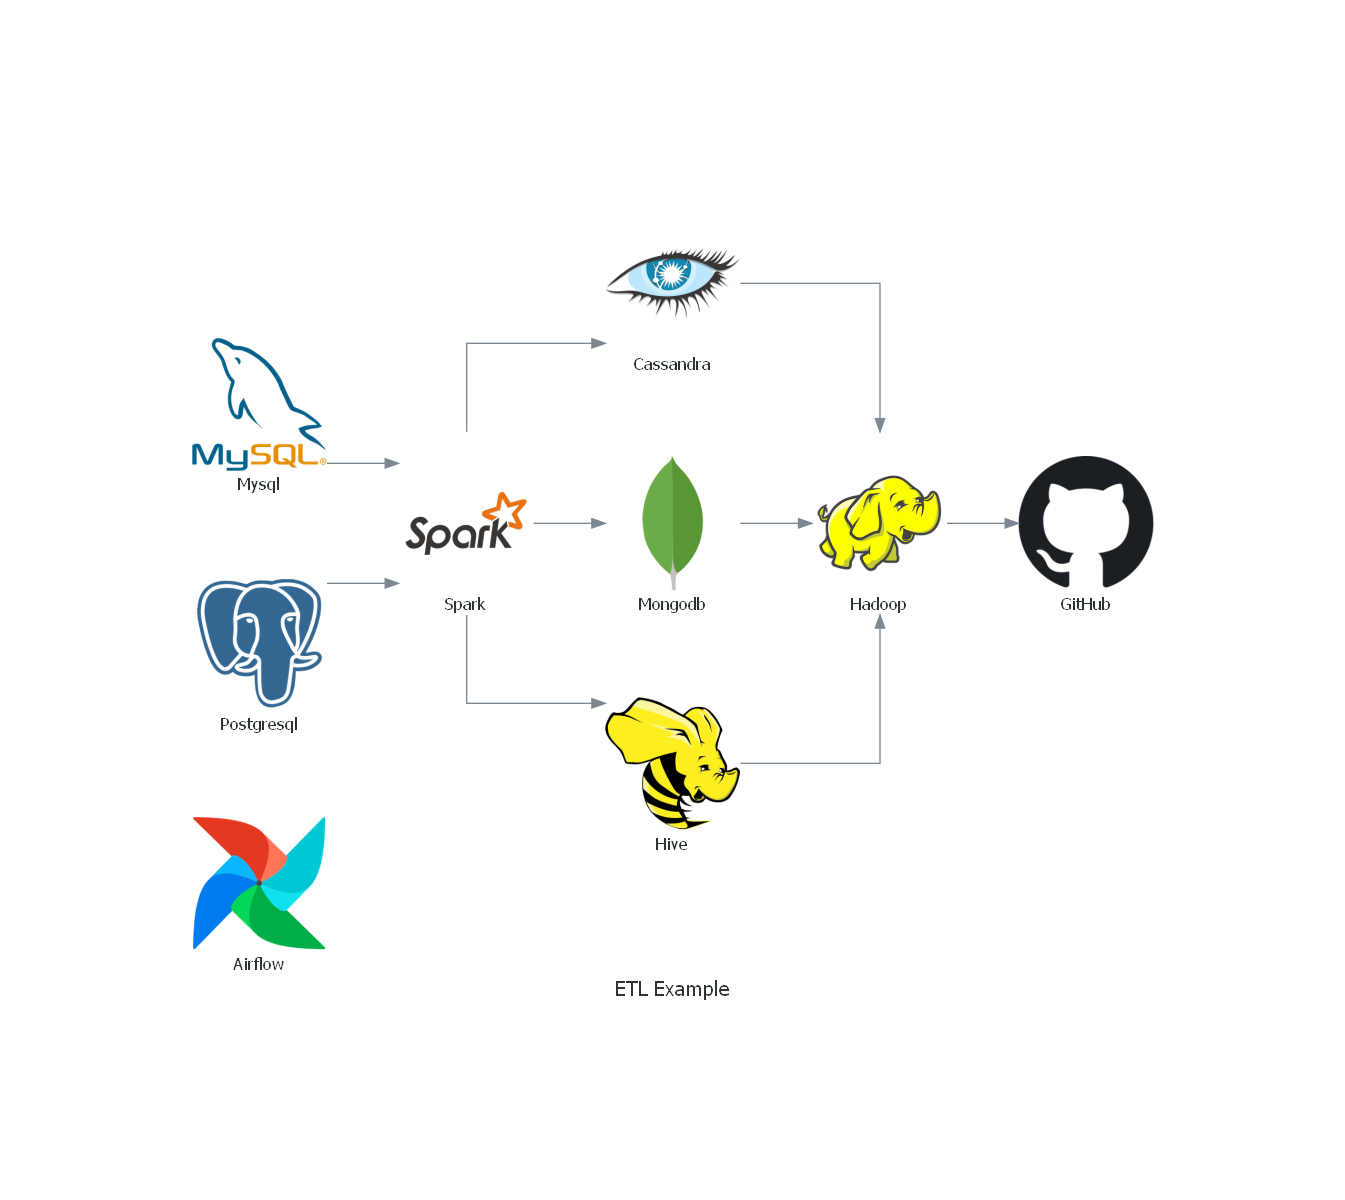

In [47]:
with Diagram("ETL Example", show=False) as diag:
Airflow("Airflow")

[Mysql("Mysql"), Postgresql("Postgresql")] >> Spark("Spark") \
>> [Cassandra("Cassandra"), Mongodb("Mongodb"), Hive('Hive')] \
>> Hadoop('Hadoop') >> Github('GitHub')

diag

## Clusters

Lets improve this and add clusters of nodes

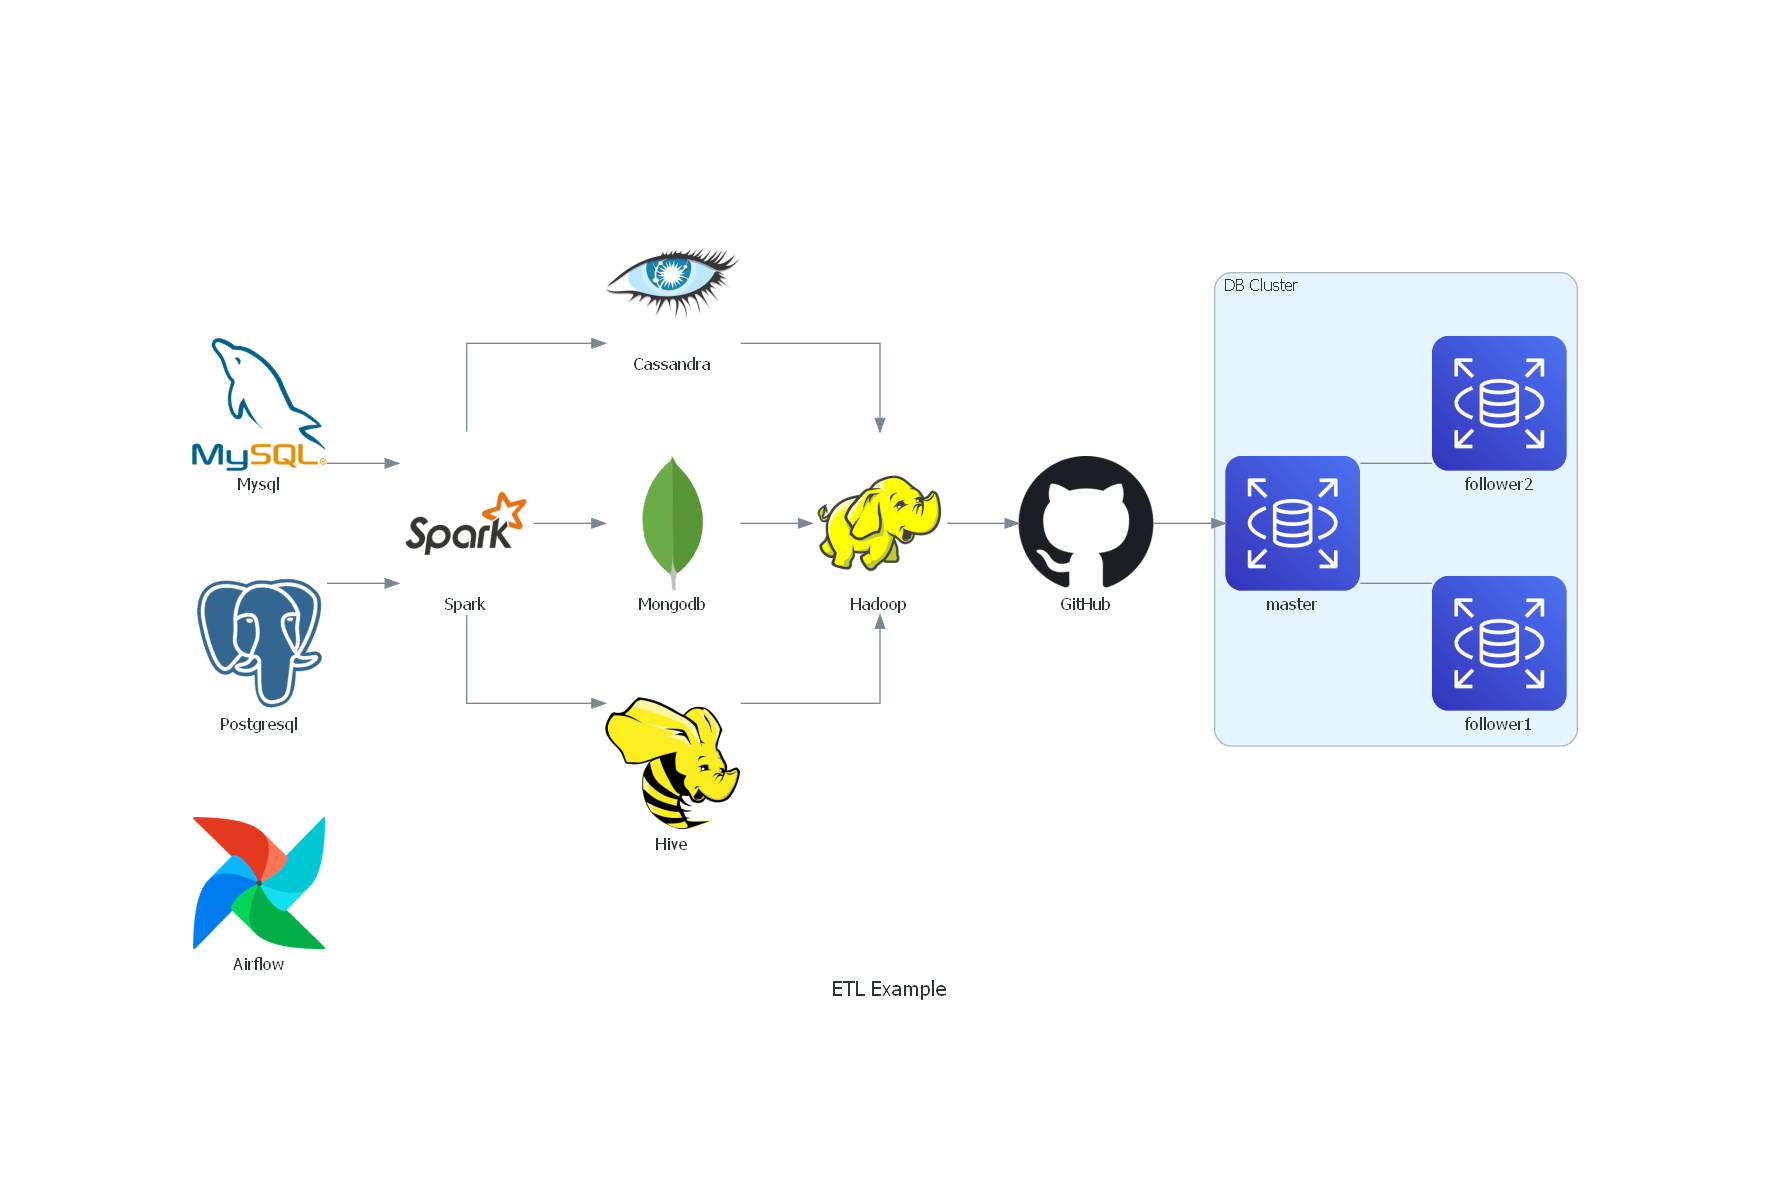

In [48]:
from diagrams import Cluster
from diagrams.aws.compute import ECS
from diagrams.aws.database import RDS
from diagrams.aws.network import Route53

with Diagram("ETL Example", show=False) as diag:
Airflow("Airflow")

flow_a = [Mysql("Mysql"), Postgresql("Postgresql")] >> Spark("Spark") \
>> [Cassandra("Cassandra"), Mongodb("Mongodb"), Hive('Hive')] \
>> Hadoop('Hadoop') >> Github('GitHub')

with Cluster("DB Cluster"):
db_master = RDS("master")
db_master- [RDS("follower1"),
 RDS("follower2")]

flow_a >> db_master
diag

## Edges

Edge is an object representing a connection between Nodes with some additional properties.

An edge object contains three attributes: label, color and style which mirror corresponding graphviz edge attributes.

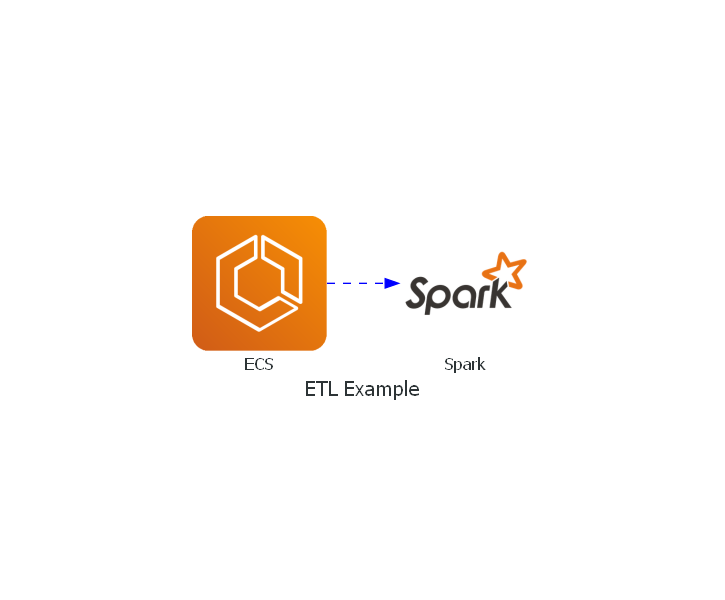

In [55]:
from diagrams import Cluster, Edge, Diagram
from diagrams.aws.compute import ECS
from diagrams.onprem.analytics import Spark

with Diagram("ETL Example", show=False) as diag:

 ECS('ECS') >> Edge(color='blue', style='dashed') >> Spark('Spark') 

diag

## Complete Example

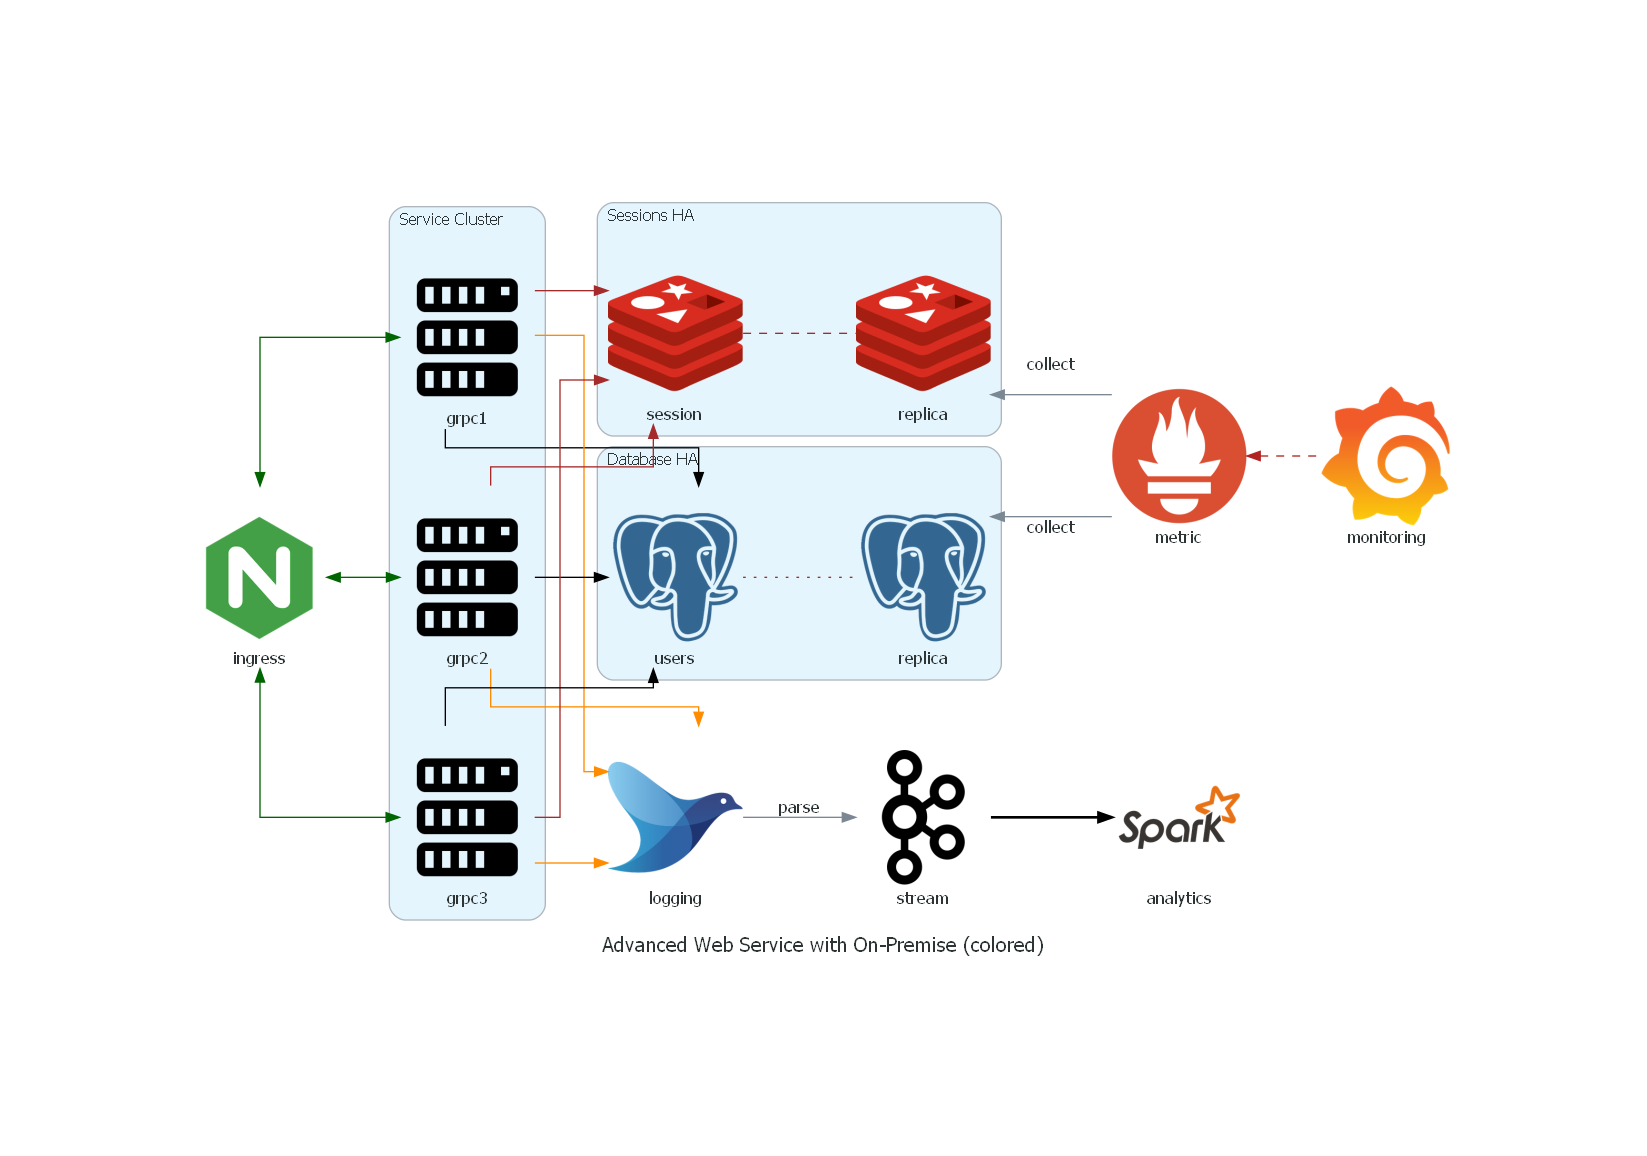

In [158]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram(name="Advanced Web Service with On-Premise (colored)", show=False) as diag:
ingress = Nginx("ingress")

metrics = Prometheus("metric")
metrics << Edge(color="firebrick", style="dashed") << Grafana("monitoring")

with Cluster("Service Cluster"):
grpcsvc = [
Server("grpc1"),
Server("grpc2"),
Server("grpc3")]

with Cluster("Sessions HA"):
primary = Redis("session")
primary \
- Edge(color="brown", style="dashed") \
- Redis("replica") \
<< Edge(label="collect") \
<< metrics
grpcsvc >> Edge(color="brown") >> primary

with Cluster("Database HA"):
primary = PostgreSQL("users")
primary \
- Edge(color="brown", style="dotted") \
- PostgreSQL("replica") \
<< Edge(label="collect") \
<< metrics
grpcsvc >> Edge(color="black") >> primary

aggregator = Fluentd("logging")
aggregator \
>> Edge(label="parse") \
>> Kafka("stream") \
>> Edge(color="black", style="bold") \
>> Spark("analytics")

ingress \
>> Edge(color="darkgreen") \
<< grpcsvc \
>> Edge(color="darkorange") \
>> aggregator


diag

- To Export the diagram just add the parameter: filename

## Playground

- General Template

In [63]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.compute import Server
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka
from diagrams.aws.analytics import DataPipeline
from diagrams.onprem.analytics import Hadoop, Hive, Spark
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.vcs import Github
from diagrams.onprem.database import Cassandra, Mongodb, Mysql, Postgresql
from diagrams.programming.language import Python, Bash

with Diagram(name="<Enter Name Of ETL>", show=False) as diag:


diag

IndentationError: expected an indented block (2276001866.py, line 18)

### Forex Data Pipeline

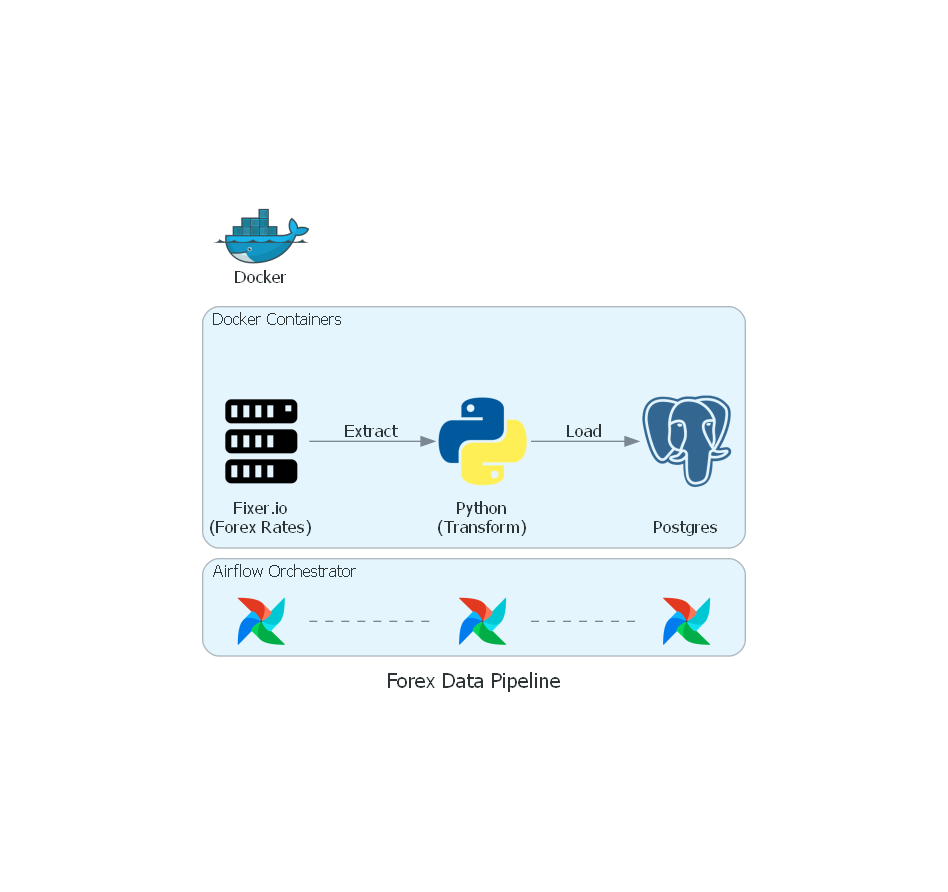

In [1]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.compute import Server
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka
from diagrams.aws.analytics import DataPipeline
from diagrams.onprem.analytics import Hadoop, Hive, Spark
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.vcs import Github
from diagrams.onprem.database import Cassandra, Mongodb, Mysql, Postgresql
from diagrams.programming.language import Python, Bash
from diagrams.onprem.container import Docker

with Diagram(name="Forex Data Pipeline", show=False, outformat='pdf', filename = 'Forex_data_pipeline') as diag:


with Cluster('Airflow Orchestrator'):
Airflow(height='0.5', width='1') - Edge(style='dashed') - Airflow(height='0.5', width='1') - Edge(style='dashed') - Airflow(height='0.5', width='1')

with Cluster('Docker Containers'):
Server('Fixer.io\n(Forex Rates)', height='2', width='1') >> \
Edge(label='Extract') >> Python('Python\n(Transform)', height='2', width='1') >> \
Edge(label='Load') >> Postgresql('Postgres', height='2', width='1')

Docker('Docker', height='1', width='1')

diag

### Moveis Data Pipeline

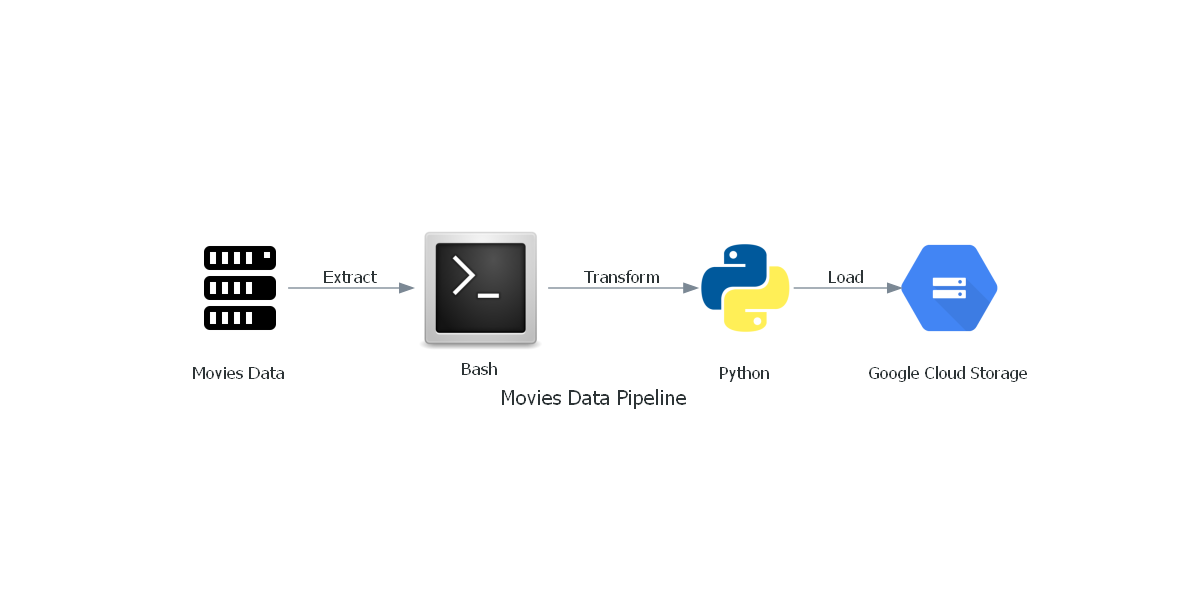

In [176]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.compute import Server
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka
from diagrams.aws.analytics import DataPipeline
from diagrams.onprem.analytics import Hadoop, Hive, Spark
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.vcs import Github
from diagrams.onprem.database import Cassandra, Mongodb, Mysql, Postgresql
from diagrams.programming.language import Python, Bash
from diagrams.onprem.container import Docker
from diagrams.gcp.storage import Storage

with Diagram(name="Movies Data Pipeline", show=False, outformat='pdf', filename = 'Forex_data_pipeline') as diag:
   
Server('Movies Data', height='2', width='1') >> Edge(label='Extract')  >> Bash('Bash') >> Edge(label='Transform') >> \
Python('Python', height='2', width='1') >> Edge(label='Load') >> \
Storage('Google Cloud Storage', height='2', width='1')

diag

### Log Activity ETL

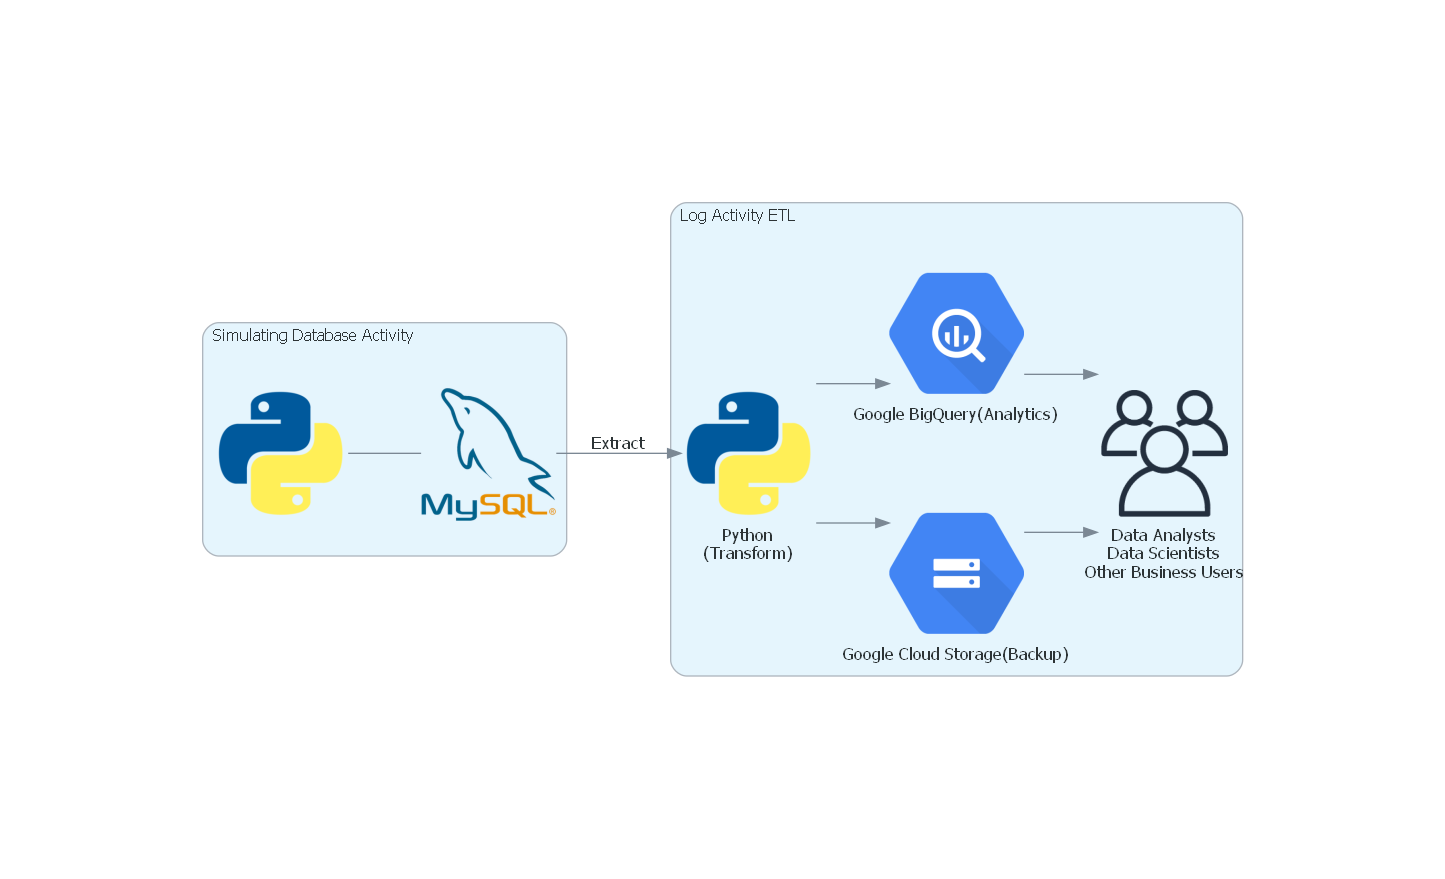

In [258]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.compute import Server
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka
from diagrams.aws.analytics import DataPipeline
from diagrams.onprem.analytics import Hadoop, Hive, Spark
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.vcs import Github
from diagrams.onprem.database import Cassandra, Mongodb, Mysql, Postgresql
from diagrams.programming.language import Python, Bash
from diagrams.onprem.container import Docker
from diagrams.gcp.storage import Storage
from diagrams.gcp.analytics import Bigquery
from diagrams.onprem.client import Users


with Diagram(show=False, outformat='pdf', filename = 'Log_Activity_ETL') as diag:
   
with Cluster('Simulating Database Activity'):
a = Python() - Mysql()
 
with Cluster('Log Activity ETL') as diag2:

a >> Edge(label = 'Extract') >> Python('Python\n(Transform)') >> \
[Storage('Google Cloud Storage(Backup)'), Bigquery('Google BigQuery(Analytics)')] >> \
Users('Data Analysts\nData Scientists\nOther Business Users')

diag

### Data Engineering Retail Store

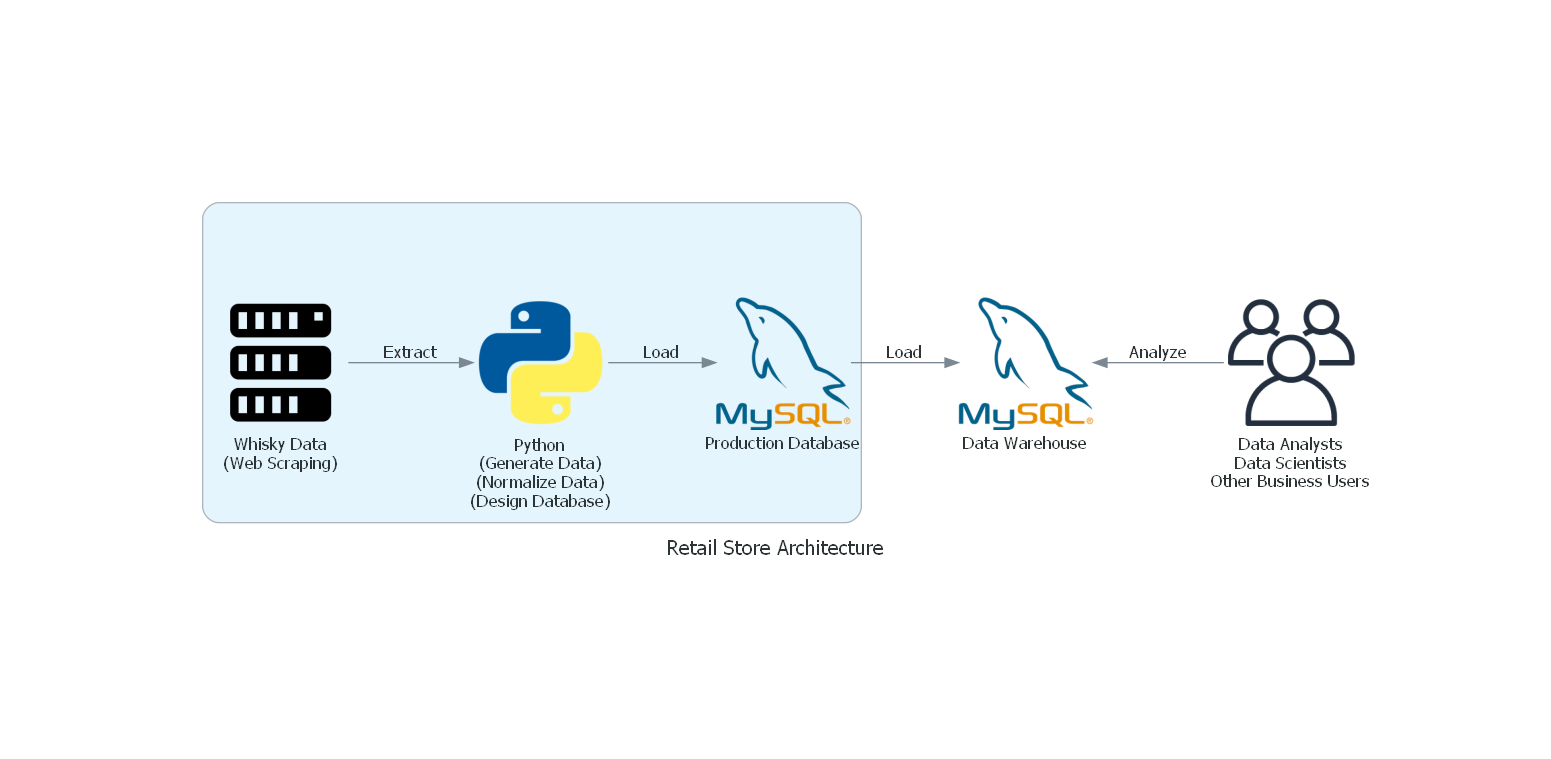

In [285]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.compute import Server
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka
from diagrams.aws.analytics import DataPipeline
from diagrams.onprem.analytics import Hadoop, Hive, Spark
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.vcs import Github
from diagrams.onprem.database import Cassandra, Mongodb, Mysql, Postgresql
from diagrams.programming.language import Python, Bash
from diagrams.onprem.container import Docker
from diagrams.gcp.storage import Storage
from diagrams.gcp.analytics import Bigquery
from diagrams.onprem.client import Users


with Diagram('Retail Store Architecture', show=False, outformat='pdf', filename = 'data_engineering_retail_store') as diag:

with Cluster(''):
a = Server('Whisky Data\n(Web Scraping)') >> Edge(label = 'Extract') >> Python('Python\n(Generate Data)\n(Normalize Data)\n(Design Database)') >> \
Edge(label = 'Load') >> Mysql('Production Database') >> Edge(label = 'Load')


a >> Mysql('Data Warehouse') << Edge(label = 'Analyze') << \
Users('Data Analysts\nData Scientists\nOther Business Users')

diag

# Bash

- Running bash commands using Python

In [ ]:
import subprocess


bashCommand = "docker cp majorityelement_postgres_1:/tmp/postgres_solution.csv ."
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

# Others

## Using python functions from the shell

In [ ]:
#!/usr/bin/env python3
import argparse
import random

from faker import Faker


def gen_user_data(file_name: str, num_records: int, seed: int = 1) -> None:
fake = Faker("en_US")
with open(file_name, "w") as file1:
for i in range(1, num_records + 1):
file1.write(
f"{seed + i},{fake.name()},{random.randint(0,1)},{fake.state()},{fake.country()}\n"
)

# Here we are add argiuments to the parser
# the first argument is called: --file-name
# It is of type str and so on
# We do this for every arguments in the function
if __name__ == "__main__":
parser = argparse.ArgumentParser(description="Generate some fake data")
parser.add_argument(
"--file-name",
type=str,
default="fake_user.csv",
help="file name to store fake data",
)
parser.add_argument(
"--num-records", type=int, default=100, help="Num of records to generate"
)

parser.add_argument("--seed", type=int, default=0, help="seed")
args = parser.parse_args()

gen_user_data(
file_name=args.file_name, num_records=args.num_records, seed=args.seed
)

In [ ]:
- When running the python file from the shell, we can now specify the arguments in the function.

In [ ]:
chmod u+rwx gen_fake.py

# run 5 parallel processes, each generating 2million records as shown below
./gen_fake.py --file-name user_data_1.csv --num-records 2000000 --seed 0 & ./gen_fake.py --file-name user_data_2.csv --num-records 2000000 --seed 2000000 & ./gen_fake.py --file-name user_data_3.csv --num-records 2000000 --seed 4000000 & ./gen_fake.py --file-name user_data_4.csv --num-records 2000000 --seed 6000000 & ./gen_fake.py --file-name user_data_5.csv --num-records 2000000 --seed 8000000 

mkdir data

cat user_data_1.csv user_data_2.csv user_data_3.csv user_data_4.csv user_data_5.csv >> ./data/user_data_fin.csv # combine data

rm user_data_1* user_data_2* user_data_3* user_data_4* user_data_5*